## Networks of Hyperlinked Wikipedia Pages 
## Originating from "Data Analysis" and "Data Science"

In [1]:
import wikipedia
import random
import networkx as nx
import pandas as pd 
import numpy as np
# import seaborn as sns
# sns.set(context="paper", font="monospace")
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import hist
import math
import operator
from collections import Counter
import itertools as it
from itertools import combinations, permutations
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import write_dot
import warnings; warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


import community
import igraph as ig

In [2]:
# Diagnostics - counts of hyperlinks
page1=wikipedia.page('Data_analysis') #'Data_science') 
page2=wikipedia.page('Data_science') 

p1=sorted([w.replace(" ","_") for w in page1.links])
p2=sorted([w.replace(" ","_") for w in page2.links])

print "The %i hyperlinks from the Wikipedia page on %s are:" %(len(p1),page1.title)
print
for i in range(len(p1)):
    print "%i. %s" %(i+1,p1[i])
print
print "The %i hyperlinks from the Wikipedia page on %s are:" %(len(p2),page2.title)
print
for i in range(len(p1)):
    print "%i. %s" %(i+1,p1[i])
print
p12=set(p1).intersection(set(p2))
p12=list(p12)
print "The %i common hyperlinks from the Wikipedia pages on %s and %s are:" %(len(p12),page1.title,page2.title)
print
for i in range(len(p12)):
    print "%i. %s" %(i+1,p12[i])

The 230 hyperlinks from the Wikipedia page on Data analysis are:

1. ASCE
2. Actuarial_science
3. Adèr,_H.J.
4. Algorithms
5. Analytics
6. Area_chart
7. Bar_chart
8. Ben_Shneiderman
9. Bifurcation_theory
10. Big_data
11. Bonferroni_correction
12. Bootstrapping_(statistics)
13. Boris_Galerkin
14. Boundary_element_method
15. Boxplot
16. Bush_tax_cuts
17. Business_intelligence
18. CERN
19. Cartogram
20. Cathy_O'Neil
21. Causality
22. Censoring_(statistics)
23. Chaos_theory
24. Chartjunk
25. Cognitive_bias
26. Collectively_exhaustive_events
27. Common-method_variance
28. Competing_on_Analytics
29. Computational_fluid_dynamics
30. Computational_physics
31. Computer_simulation
32. Confirmation_bias
33. Congressional_Budget_Office
34. Contextualization_(computer_science)
35. Control_chart
36. Correlation_and_dependence
37. Cronbach's_alpha
38. Cross-industry_standard_process_for_data_mining
39. Cross-validation_(statistics)
40. Daniel_Patrick_Moynihan
41. Data
42. Data_(computing)
43. Data_An

In [3]:
# Diagnostics - counts of edges
eds1=[]
for pp in p1:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    except wikipedia.exceptions.DisambiguationError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p1))
    if len(ih)>0:
#         print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
#         print
        for q in ih:
            eds1.append((pp,q))
print len(eds1)

3920


In [4]:
# Diagnostics - counts of edges
eds2=[]
for pp in p2:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    except wikipedia.exceptions.DisambiguationError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p2))#changed p to p2
    if len(ih)>0:
#         print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
#         print
        for q in ih:
            eds2.append((pp,q))
print len(eds2)

6792


In [5]:
#total edges
eds=list(set(eds1+eds2))
len(eds)

10637

<b> Diagnostics (counts of nodes and edges)

In [6]:
G=nx.DiGraph()
G.add_edges_from(eds)
ss="The graph of the %i Wikipedia webpages which are hyperlinks of the Wikipedia pages on '%s' and on '%s' has: \n %i nodes and %i edges" %(len(G.nodes()),page1.title,page2.title,len(G.nodes()),len(G.edges()))
print ss

The graph of the 374 Wikipedia webpages which are hyperlinks of the Wikipedia pages on 'Data analysis' and on 'Data science' has: 
 374 nodes and 10637 edges


In [7]:
#remove irrelevant nodes not relating to Data Science or Data Analysis
excluded_list = ["International_Standard_Book_Number", "Digital_object_identifier" , "Integrated_Authority_File", "International_Standard_Serial_Number","PubMed_Identifier", "PubMed_Central"]

for x in excluded_list:
    if x in list(G.nodes()):
        print x
    else:
        print x,"is not found"

International_Standard_Book_Number
Digital_object_identifier
Integrated_Authority_File
International_Standard_Serial_Number
PubMed_Identifier
PubMed_Central


In [8]:
for x in excluded_list:
    G.remove_node(x)

for x in excluded_list:
    if x in list(G.nodes()):
        print x
    else:
        print x,"is not found"

International_Standard_Book_Number is not found
Digital_object_identifier is not found
Integrated_Authority_File is not found
International_Standard_Serial_Number is not found
PubMed_Identifier is not found
PubMed_Central is not found


<b>  Graph - Data Analysis and Data Science </b>

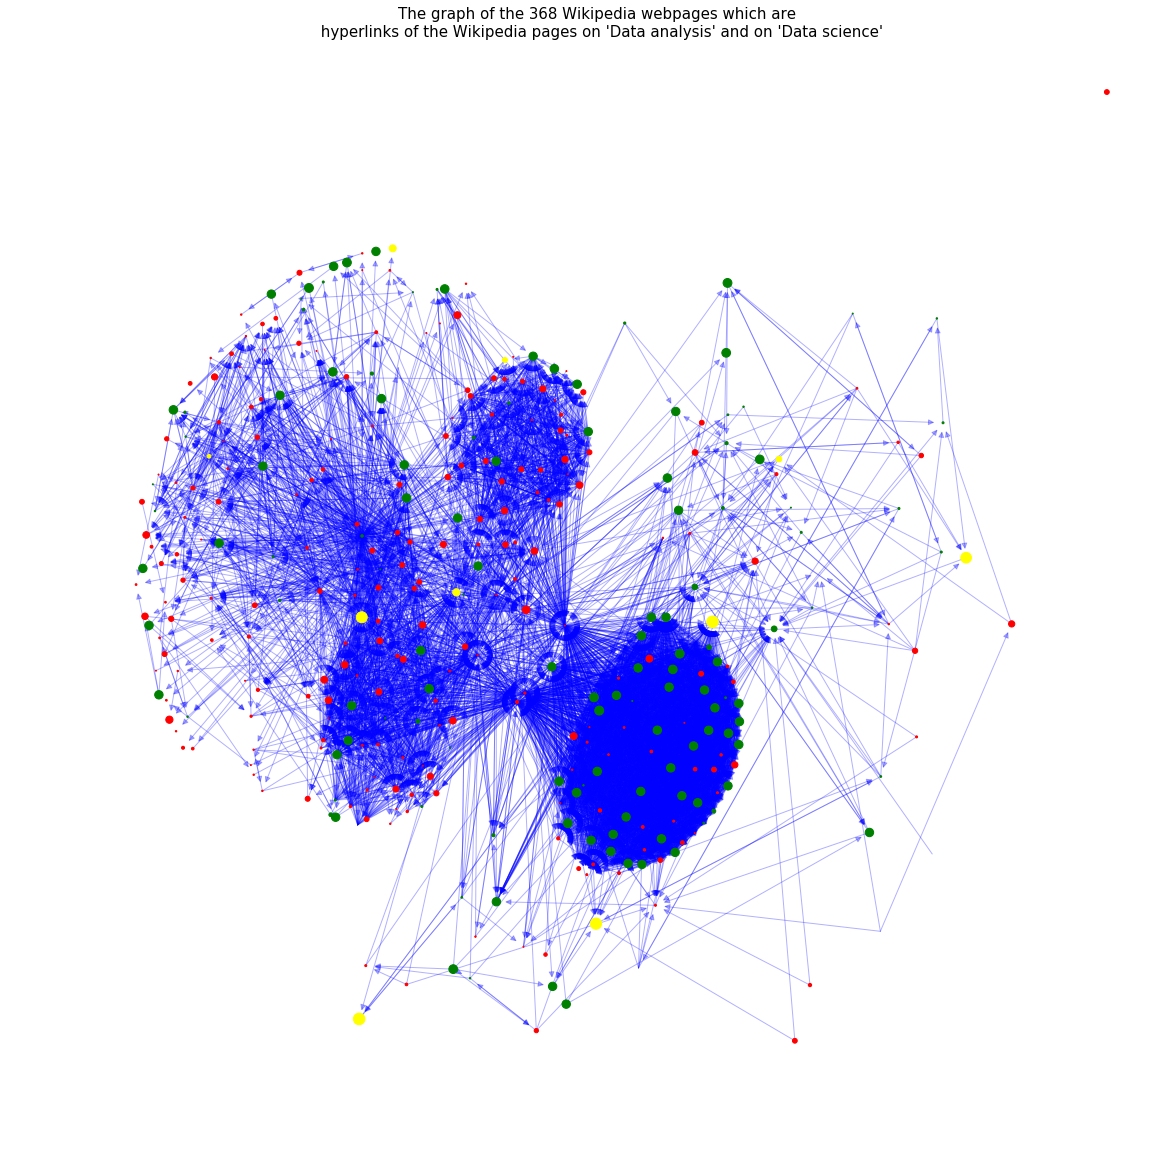

In [9]:
pos=graphviz_layout(G)

# pos=nx.spring_layout(G,2.)

type={}
for n in G.nodes():
    if n in p1 and n not in p2:
        type[n]='r'
    elif n in p2 and n not in p1:
        type[n]='g'
    else:
        type[n]='yellow'
plt.figure(figsize=(20,20));
nodes = nx.draw_networkx_nodes(G, pos, node_color=type.values(),node_size=dict(G.in_degree()).values()) #, alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=12, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia pages on '%s' and on '%s'" %(len(G.nodes()),page1.title,page2.title)
plt.title(ss,fontsize=15);
# plt.margins(x=0.3, y=0) 

<b> Diagnostics (description of connectivity type, counts of graph density and reciprocity) </b>

In [10]:
#graph description
if G.is_multigraph()==True:
    print "G is a multigraph"
else:
    print "G is a simple graph"
if nx.is_weighted(G)==True:
    print "G is a weighted graph"
else:
    print "G is an unweighted graph"
if G.is_directed()==True:
    print "G is a directed graph"
else:
    print "G is an undirected graph"    
if nx.is_bipartite(G)==True:
    print "G is a bipartite graph"
else:
    print "G is not a bipartite graph"    
if nx.is_tree(G)==True:
    print "G is a tree"
else:
    print "G is not a tree"    
if G.is_directed()==False:
    if nx.is_connected(G)==True:
        print "G is a connected graph"
    else:
        print "G is a disconnected graph and it has",nx.number_connected_components(G),"connected components"    
else:
    if nx.is_strongly_connected(G)==True:
        print "G is a strongly connected graph"
    else:
        print "G is not strongly connected and it has",nx.number_strongly_connected_components(G),"strongly connected components"
    if nx.is_weakly_connected(G)==True:
        print "G is a weakly connected graph"
    else:
        print "G is not weakly connected and it has",nx.number_weakly_connected_components(G),"weakly connected components"    
if len(list(nx.isolates(G)))>0:
    print "G has",len(list(nx.isolates(G))),"isolates"
else:
    print "G has no isolates"
print "The density of G is %.3f" %nx.density(G)   
print "G has reciprocity = ", nx.reciprocity(G)

G is a simple graph
G is an unweighted graph
G is a directed graph
G is not a bipartite graph
G is not a tree
G is not strongly connected and it has 47 strongly connected components
G is not weakly connected and it has 2 weakly connected components
G has 1 isolates
The density of G is 0.073
G has reciprocity =  0.696206373293


<b> scale-free </b>

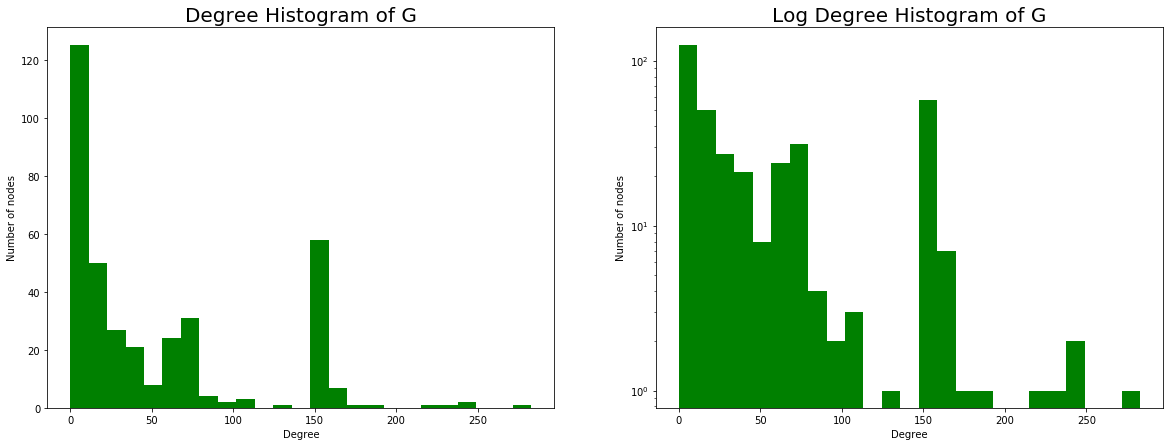

In [11]:
ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
ss='Degree Histogram of G' 
plt.title(ss,fontsize=20);
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
sss='Log Degree Histogram of G' 
plt.title(sss,fontsize=20);

m = -0.43625993941137553 c = 1.1147024077086989
the graph is not scale-free


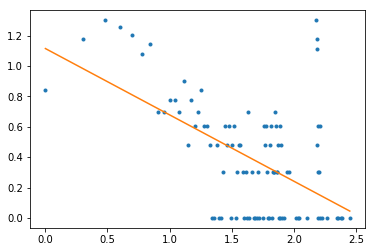

In [12]:
k = []
Pk = []

for node in list(G.nodes()):
    degree = G.degree(nbunch=node)
    try:
        pos = k.index(degree)
    except ValueError as e:
        k.append(degree)
        Pk.append(1)
    else:
        Pk[pos] += 1

logk=[]
logPk=[]
# get a double log representation
for i in range(len(k)):
    if k[i]>0:
        logk.append(math.log10(k[i]))
        logPk.append(math.log10(Pk[i]))

order = np.argsort(logk)
logk_array = np.array(logk)[order]
logPk_array = np.array(logPk)[order]
plt.plot(logk_array, logPk_array, ".")
m, c = np.polyfit(logk_array, logPk_array, 1)
print "m =",m, "c =",c
plt.plot(logk_array, m*logk_array + c, "-");

if m>-3 and m<-2:
    print "The graph is scale-free"
else:
    print "the graph is not scale-free"

<b> Centralities (with dataframes, plots and pairplots) </b>

In [13]:
# Centralities Set-Up
def create_centralities_list(G,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','betweenness','eigenvector','Katz','PageRank','HITS','load','communicability','current flow']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(G,nx.DiGraph):
                cent=nx.in_degree_centrality(G)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(G)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(G)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(G)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(G)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(G, nx.DiGraph):
                cent=nx.communicability_betweenness_centrality(G)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(G)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(G, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(G)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(G,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
            cent=nx.katz_centrality_numpy(G,1/phi-0.01)
            cent=nx.katz_centrality_numpy(G,.05)#,1/phi-0.01)
            
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent
#             valus[centr+'_%i' %pphi]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(G)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(G,nx.DiGraph):
                dd=nx.hits(G,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(G)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        else:
            continue
#         print '%s done!!!' %sstt
    return valus

dindices=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices=['degree','closeness','betweenness','eigenvector']

# Without 'communicability' and 'current flow' (undirected case)
dindicesd=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indicesd=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load']
# indicesd=['degree','closeness','betweenness','eigenvector']

dindicesdr=dindices
indicesdr=indices

# Plus 'node'
dindicesdrn=["node"]+dindices
indicesdrn=['node']+indices

def central_df(G,node,central_pd):
    central_pd[node]=central_pd.index.values
    if isinstance(G,nx.DiGraph):
        central_pd=central_pd[[node]+dindices]
    else:
        central_pd=central_pd[[node]+indices]
    central_pd[node]=central_pd.index.values
    central_pd.reset_index(drop = True, inplace = True)
    # central_pd=central_pd[['node']]
    central_pd.sort_values(node) #.head()
    # central_pd['node']=G.nodes()
    return central_pd

<b> Centralities (dataframe) </b>

In [14]:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node  out_degree  in_degree  \
0                                           ASCE    0.002725   0.005450   
1                               Academic_journal    0.002725   0.027248   
2                            Academic_publishing    0.013624   0.008174   
3                                        Academy    0.010899   0.002725   
4                              Actuarial_science    0.073569   0.100817   
5                                     Adèr,_H.J.    0.005450   0.002725   
6                                     Algorithms    0.010899   0.008174   
7               American_Statistical_Association    0.005450   0.008174   
8                                      Analytics    0.038147   0.038147   
9                                Anand_Rajaraman    0.002725   0.016349   
10                             Anomaly_detection    0.223433   0.190736   
11                               Applied_science    0.013624   0.013624   
12                                    Area_chart    0.013624   0.027248   
13                     Artificial_neural_network    0.228883   0.196185   
14                    Artificial_neural_networks    0.226158   0.193460   
15                     Association_rule_learning    0.223433   0.190736   
16                                   Autoencoder    0.223433   0.190736   
17                    Automated_machine_learning    0.223433   0.190736   
18                                         BIRCH    0.000000   0.193460   
19                                     Bar_chart    0.073569   0.125341   
20                                Basic_research    0.008174   0.002725   
21                              Bayesian_network    0.016349   0.196185   
22                               Ben_Shneiderman    0.032698   0.049046   
23                         Bias–variance_dilemma    0.016349   0.193460   
24                            Bifurcation_theory    0.005450   0.013624   
25                                      Big_data    0.079019   0.081744   
26                         Bonferroni_correction    0.008174   0.002725   
27                   Boosting_(machine_learning)    0.035422   0.193460   
28                         Bootstrap_aggregating    0.223433   0.190736   
29                    Bootstrapping_(statistics)    0.008174   0.100817   
..                                           ...         ...        ...   
338                        Structured_prediction    0.223433   0.190736   
339                                 Subharmonics    0.002725   0.005450   
340                          Supervised_learning    0.226158   0.207084   
341                       Support-vector_machine    0.226158   0.193460   
342                        System_identification    0.076294   0.098093   
343  T-distributed_stochastic_neighbor_embedding    0.223433   0.190736   
344                          Table_(information)    0.038147   0.051771   
345                               Tamara_Munzner    0.032698   0.049046   
346                 Temporal_difference_learning    0.226158   0.193460   
347                                  Test_method    0.005450   0.005450   
348                               Text_analytics    0.024523   0.010899   
349                           The_Data_Incubator    0.008174   0.005450   
350                      The_Wall_Street_Journal    0.005450   0.010899   
351                                       Theory    0.008174   0.005450   
352                          Thomas_H._Davenport    0.005450   0.008174   
353                          Turbulence_modeling    0.002725   0.021798   
354                                 Turing_award    0.016349   0.002725   
355                                 Type_1_error    0.076294   0.002725   
356                    Type_I_and_type_II_errors    0.076294   0.019074   
357                                        U-Net    0.223433   0.190736   
358             United_Nations_Development_Group    0.000000   0.005450   
359                          University_of_Essex    0.005450   0.0000

<b> Top 5 Centralities </b>

In [15]:
h = 5 # number of top centralities
cdf=central_df(G,node,central_pd)
DFC={}
for c in dindices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc

for k,v in DFC.items():
    print "centrality index:",k
    print v

centrality index: load
                           node      load
0                   Data_mining  0.178659
1                    Statistics  0.136368
2                 Data_Analysis  0.115920
3              Machine_learning  0.090583
4  Principal_component_analysis  0.072392
centrality index: Katz
                    node      Katz
0        Data_collection  0.239939
1          Data_curation  0.146795
2           Missing_data  0.143569
3            Data_mining  0.142897
4  Statistical_inference  0.142003
centrality index: HITS_hubs
                           node  HITS_hubs
0                   Data_mining   0.013373
1  Principal_component_analysis   0.013307
2           Regression_analysis   0.013242
3              Machine_learning   0.013197
4              Cluster_analysis   0.013066
centrality index: out_degree
                           node  out_degree
0                 Data_Analysis    0.615804
1                   Data_mining    0.405995
2  Principal_component_analysis    0.324251
3

<b> Most Important Nodes based on Centralities </b>

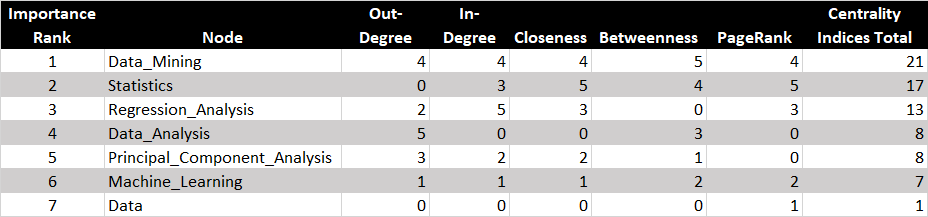

<b> Centralities graphs </b>

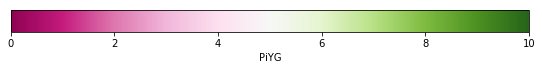

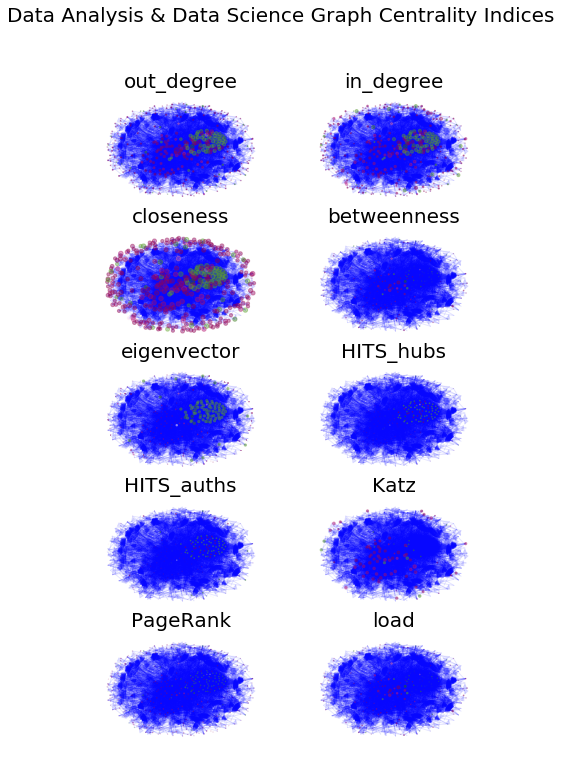

In [16]:
#adjusted sizes of nodes to 50
name="Data Analysis & Data Science Graph"

pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
norm=norm,
orientation='horizontal')
cb1.set_label('PiYG')
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[50*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.1)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

<b> Centralities pairplots </b>

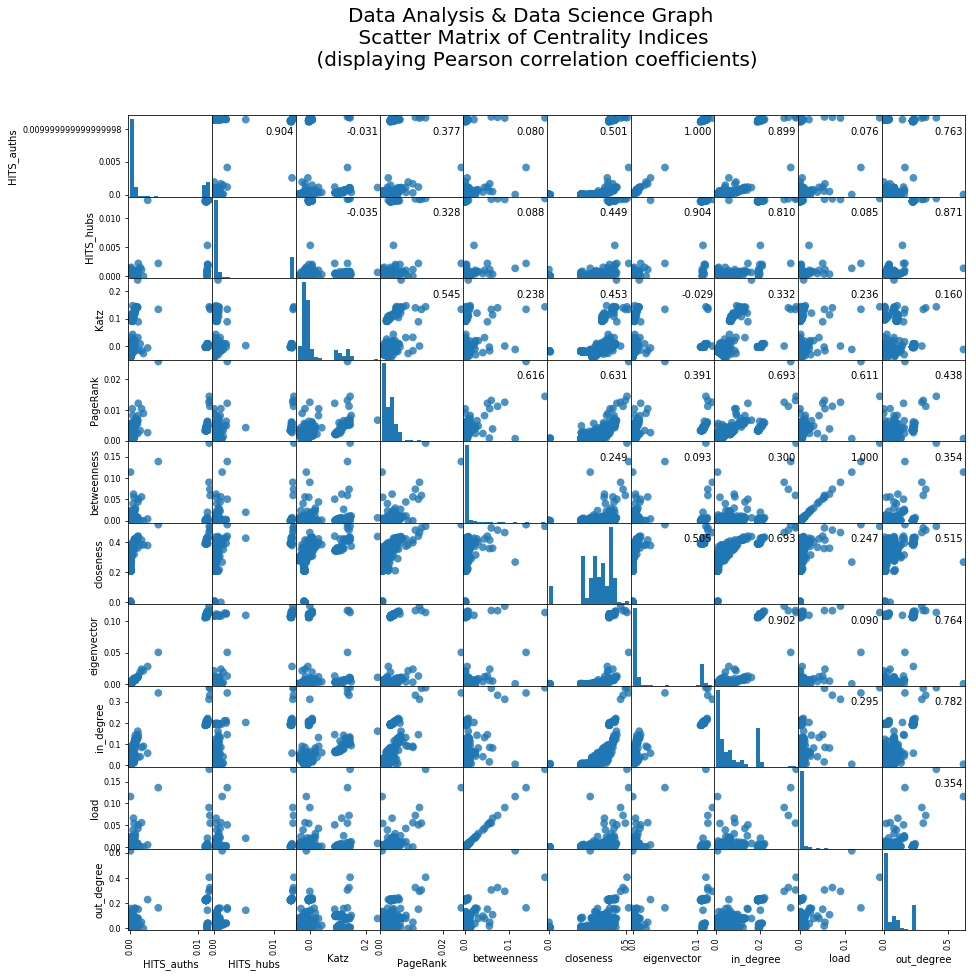

In [17]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

## Co-hyperlinked undirected graph

In [18]:
G2=G.copy()
medgesout=[]
n_out=[n for n in G2.nodes() if G2.out_degree(n)>1]
for n in n_out:
    nn=list(G2.successors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesout.append((j[0],j[1]))

name="the corresponding to G induced co-linked undirected graph"
Gcout=nx.MultiGraph()
Gcout.add_edges_from(medgesout)
Gcout=nx.MultiGraph(Gcout,name=name)

Gcout1=Gcout.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcout1.edges()).items()]
Gcout1 = nx.Graph(weight)
edge_width=[Gcout1[u][v]['weight'] for u,v in Gcout1.edges()]

In [19]:
for i in weight:
    print i[2]["weight"]

1
22
70
2
1
1
1
1
1
3
1
19
1
4
1
1
2
1
1
69
3
13
5
2
7
1
1
3
1
1
4
1
1
2
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
69
1
1
1
76
2
2
1
3
1
1
1
1
1
1
1
1
3
1
1
2
1
1
8
1
4
1
1
1
2
1
2
10
1
1
1
1
2
70
70
2
1
4
10
1
1
15
2
1
70
1
1
22
1
2
1
2
1
1
1
1
1
4
1
3
70
1
1
2
1
2
1
2
1
1
1
1
4
1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
1
1
4
1
1
70
1
1
1
1
1
2
43
1
2
1
1
1
2
2
2
2
1
1
3
3
10
2
1
1
1
1
1
25
34
1
1
1
1
2
69
2
69
2
1
1
68
1
2
1
3
1
1
2
1
3
14
1
2
1
1
3
1
3
1
1
2
1
1
1
1
1
1
11
3
1
1
1
1
2
11
10
3
1
2
1
1
23
69
2
4
69
1
1
2
1
69
1
8
1
2
70
1
1
1
1
8
1
2
1
69
1
1
4
1
69
1
1
69
1
1
1
6
1
1
1
1
14
1
1
1
9
3
1
1
4
1
69
1
1
1
1
1
3
2
37
1
1
69
1
70
1
2
1
69
69
1
7
2
9
1
3
1
5
2
1
1
1
1
1
1
1
1
2
1
69
1
4
1
2
1
1
1
1
2
2
1
1
1
1
1
1
8
3
69
1
4
2
1
1
2
6
1
1
2
70
70
4
4
1
1
1
1
1
70
2
4
3
1
3
2
1
23
1
1
1
1
69
2
1
1
4
1
1
5
69
1
1
69
1
1
2
2
2
1
1
1
1
1
1
2
4
1
1
1
1
1
1
1
1
71
3
1
2
1
1
1
4
1
1
2
1
1
6
8
1
1
2
1
1
1
4
1
1
1
70
1
1
7
1
1
2
1
1
7
69
1
3
21
1
3
1
2
2
1
3
1
4
70
1
1
1
36
1
1
1
12
1
1
1
1
4
1
2
1
1
2
2
1


9
1
69
1
3
2
1
1
1
1
10
1
1
1
2
1
1
71
1
2
69
1
1
4
22
1
2
2
70
2
1
2
10
1
15
2
1
1
1
2
1
1
1
1
1
1
1
1
3
6
3
1
1
3
1
1
1
1
1
1
1
70
1
6
1
2
1
2
1
1
1
1
3
1
1
1
1
2
1
1
69
1
1
1
1
1
2
1
24
1
1
3
22
1
10
1
1
1
1
1
69
3
1
1
4
1
1
1
1
1
1
3
1
1
1
1
1
1
1
2
1
1
1
22
4
2
16
70
1
1
69
1
1
1
1
1
1
3
1
1
2
1
1
1
10
1
2
3
69
1
4
1
2
1
2
1
4
1
69
1
69
1
1
1
1
17
3
1
1
1
22
1
1
1
2
1
1
15
1
2
1
8
1
5
2
2
1
1
2
1
1
6
1
2
11
1
2
70
2
1
4
2
8
2
1
2
2
3
1
1
26
2
2
1
69
1
1
1
70
1
1
1
2
1
1
1
1
1
1
3
1
7
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
70
74
1
2
35
1
1
70
71
3
1
1
70
1
1
1
1
1
1
1
1
69
69
1
70
1
1
2
1
70
2
1
2
1
1
1
70
71
1
1
1
2
1
1
69
1
3
1
1
1
70
1
1
1
1
6
1
1
1
1
69
1
1
1
1
37
1
1
1
3
4
1
2
69
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
36
69
11
1
2
1
1
1
8
4
2
1
1
1
1
3
1
4
1
1
9
8
1
11
15
3
23
2
3
1
69
2
2
3
21
2
1
1
69
2
1
2
1
5
35
1
4
1
1
1
1
1
2
2
1
69
2
70
2
70
9
2
1
4
4
69
34
7
4
69
12
2
1
1
1
2
1
2
1
2
4
69
2
1
1
1
3
1
15
1
1
1
1
1
2
1
1
1
1
3
6
2
69
69
1
1
1
4
1
1
1
1
1
1
1
1
2
6
1
1
1
4
4
1
8
16

24
2
2
3
2
1
1
9
1
1
1
11
2
1
1
8
69
1
1
1
2
3
2
1
22
1
11
1
8
4
2
1
1
2
1
1
2
3
1
1
1
1
1
1
2
1
5
1
2
70
5
69
3
70
4
8
2
1
1
1
2
34
7
1
1
1
7
70
1
1
1
3
68
1
1
1
69
69
1
4
1
8
25
1
10
1
10
21
2
1
1
2
2
3
9
1
1
4
2
1
1
1
4
1
2
1
1
1
69
1
4
1
1
2
1
8
1
1
1
69
70
1
1
1
1
1
1
4
69
4
22
1
4
1
1
8
1
1
4
2
1
1
1
2
1
2
3
1
69
1
1
3
1
1
69
4
10
1
1
1
1
1
1
2
2
1
1
1
1
70
1
69
1
1
1
1
69
1
1
69
1
1
1
2
1
4
1
1
4
8
69
1
1
1
5
70
3
1
1
2
1
1
1
1
1
1
1
1
15
1
2
69
8
3
2
1
2
1
1
70
2
69
2
1
2
8
3
2
1
9
1
1
1
1
1
1
1
1
1
1
2
1
8
1
3
1
1
1
1
1
2
2
1
2
1
1
1
4
1
3
1
1
2
1
1
1
1
1
2
2
1
2
1
1
69
1
3
2
69
70
69
1
1
1
1
2
9
1
1
1
3
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
69
83
3
2
1
1
2
3
1
1
1
36
1
22
1
1
2
1
1
1
1
1
70
1
4
9
68
1
2
70
1
69
1
10
1
1
1
28
1
1
2
1
1
1
1
2
1
1
1
1
1
21
69
1
2
1
1
1
1
1
1
69
2
23
2
2
1
1
1
4
3
1
7
22
1
1
1
1
2
1
1
1
1
1
1
3
2
3
2
1
69
2
1
2
3
1
1
7
1
3
2
1
1
10
3
1
3
2
4
4
1
1
1
1
3
5
9
70
1
2
2
73
1
1
34
1
1
3
69
1
1
2
1
70
1
3
1
1
2
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
1
2
69
1
69
1
1

1
23
1
21
1
1
1
17
1
5
70
1
1
2
1
1
2
4
1
6
68
1
70
1
3
70
2
2
1
3
1
1
1
2
69
1
2
1
18
1
1
1
1
3
1
10
1
1
1
2
4
1
1
6
10
1
3
1
70
1
1
1
1
1
2
1
1
1
1
1
1
2
35
1
1
3
1
1
22
9
1
1
2
69
2
1
1
1
1
5
68
1
1
1
2
1
4
1
1
2
1
4
1
2
4
3
1
1
1
1
1
4
1
1
2
11
69
2
2
1
2
69
1
70
1
1
1
1
69
1
1
1
2
1
1
1
1
2
70
1
69
23
1
4
2
1
1
1
70
1
1
1
1
2
1
1
7
5
71
8
2
1
10
2
1
1
3
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
22
2
1
3
1
1
1
4
1
1
2
1
1
1
2
23
1
1
1
15
1
1
69
2
1
1
1
1
1
70
5
1
1
1
1
1
2
1
70
69
70
1
1
2
1
71
1
1
71
3
1
1
3
3
1
1
1
1
1
2
1
2
6
1
1
9
2
1
1
1
8
69
3
1
1
2
1
1
2
1
1
1
1
3
1
1
1
1
73
1
11
22
2
1
5
1
1
1
1
70
2
1
70
1
1
1
1
1
1
1
1
2
1
1
4
1
1
2
2
1
3
1
23
1
1
1
1
1
1
1
1
5
1
1
10
9
1
1
1
1
4
2
9
1
1
1
2
2
1
2
70
2
1
1
1
1
1
70
1
1
1
1
70
1
1
1
1
2
1
1
1
1
5
1
1
1
6
5
2
69
1
1
1
1
3
1
1
1
1
2
10
7
1
1
10
1
1
69
1
1
3
1
4
1
69
2
1
11
1
1
1
1
22
1
3
8
1
69
69
1
2
6
2
22
1
1
2
69
1
1
1
1
15
1
5
3
1
2
1
1
1
6
1
69
2
2
1
24
2
1
6
1
1
2
1
1
2
1
11
5
2
69
70
1
1
2
1
4
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2

1
70
2
2
69
1
1
2
36
1
2
1
4
1
1
1
1
1
2
1
1
69
1
69
1
3
3
1
1
1
1
2
1
1
70
6
3
1
1
1
1
1
6
1
69
69
1
69
2
1
1
1
1
1
1
3
2
8
1
1
1
1
1
21
4
25
1
70
1
1
1
1
1
1
1
23
1
1
15
3
1
2
2
1
1
2
1
1
1
42
3
1
2
2
5
69
41
1
1
1
1
1
2
1
1
3
1
1
2
1
1
18
4
1
3
1
2
1
1
1
1
1
1
1
2
1
1
68
1
1
37
11
36
1
69
2
1
5
2
1
2
1
69
1
1
1
1
1
2
4
1
2
1
1
9
1
1
1
1
12
1
16
2
1
1
10
70
1
69
1
1
3
1
5
1
1
1
1
69
3
1
70
1
2
4
9
2
3
1
1
2
1
2
69
1
1
1
1
7
1
1
2
1
2
2
17
1
1
1
70
1
1
1
2
1
1
1
21
3
1
1
1
2
1
1
7
1
69
1
2
2
3
69
1
5
69
1
1
1
1
2
2
2
1
1
1
1
1
1
36
1
2
1
1
3
1
70
3
1
4
1
1
2
1
12
69
6
3
2
1
14
1
69
1
1
1
2
1
2
1
2
1
1
3
1
70
1
2
1
1
1
1
1
1
1
3
4
1
1
10
1
3
1
1
1
11
8
1
1
1
1
1
69
1
1
1
69
69
2
1
5
1
1
22
1
2
1
1
1
1
1
9
1
69
1
1
1
1
1
3
1
1
1
2
1
10
1
1
1
1
1
1
1
1
1
1
10
2
1
1
1
8
2
1
22
1
1
1
3
1
1
70
13
1
2
69
1
69
1
1
2
8
4
1
1
1
1
1
1
1
2
70
1
1
2
4
3
1
2
1
1
69
6
1
1
69
1
1
1
1
1
4
1
1
1
4
1
1
1
2
1
1
1
2
70
1
1
1
1
2
69
1
1
1
2
70
10
2
2
5
1
8
2
1
69
1
1
24
1
1
24
1
2
1
4
3
9
69
4
1
2
1
2
10
1

1
1
1
1
1
2
3
1
5
1
1
69
70
1
1
1
1
2
1
1
70
2
1
1
8
1
1
1
1
1
1
6
70
70
7
1
1
1
2
71
4
1
2
1
1
1
1
2
22
2
1
1
1
1
2
1
2
3
1
1
1
2
1
1
11
2
3
1
4
70
1
1
1
8
1
2
2
69
10
4
2
1
2
21
1
1
3
1
1
4
1
9
1
1
22
1
1
1
2
70
1
1
1
1
1
1
11
1
2
4
70
1
1
2
1
1
5
1
2
1
2
1
1
1
1
1
69
1
2
1
1
1
23
1
1
1
3
1
2
1
1
17
2
1
1
1
1
1
1
1
1
2
1
1
1
12
1
1
2
1
3
10
1
2
3
1
6
1
13
5
1
2
70
2
1
70
1
1
2
1
2
23
2
1
1
1
1
1
1
1
1
2
1
21
1
1
10
69
1
70
1
1
1
1
69
69
69
1
1
2
1
1
6
1
1
1
70
10
68
2
3
2
2
1
1
1
1
1
1
10
2
28
1
2
1
1
1
1
1
1
1
2
1
1
69
1
13
2
1
1
1
1
70
1
1
5
1
1
1
1
1
1
2
2
1
3
2
1
1
1
1
1
1
8
2
71
1
1
70
1
69
3
1
1
4
1
2
1
1
1
69
1
1
1
1
1
3
1
1
1
1
69
7
2
1
5
1
1
69
1
1
1
1
8
1
8
7
1
1
1
1
1
3
1
70
1
1
1
1
1
1
1
2
2
1
2
1
1
1
1
1
7
1
1
1
1
2
1
1
5
1
2
70
1
2
2
1
2
2
1
1
1
1
1
2
1
3
2
69
3
1
2
71
3
1
10
2
2
1
2
70
10
2
70
1
69
1
1
1
1
70
35
1
1
69
1
1
1
1
2
1
2
1
1
1
1
1
1
1
4
69
1
69
12
12
1
1
1
7
1
1
1
1
1
70
22
1
1
1
1
1
2
1
69
1
2
2
2
1
1
4
1
1
1
2
1
1
1
1
2
1
1
7
2
1
12
1
1
1
1
1
2
1
34
4
69


1
1
1
1
1
1
1
1
1
1
4
70
2
1
1
8
8
1
1
1
69
1
4
2
1
1
1
3
3
2
1
69
1
1
1
1
1
1
1
4
9
23
4
70
22
1
2
1
1
1
1
2
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
70
2
1
4
2
1
1
70
1
2
71
24
3
1
1
1
1
34
3
8
1
1
1
1
1
1
4
3
1
37
1
69
1
1
70
1
1
69
1
2
2
2
1
1
69
1
1
1
69
1
2
1
2
1
1
2
1
69
70
69
1
1
1
1
1
1
1
1
1
69
1
10
2
8
1
1
4
11
1
2
1
4
3
1
42
1
1
1
69
1
6
3
1
4
1
12
4
1
1
1
1
1
1
1
1
3
72
1
1
3
1
1
1
4
3
5
1
1
1
1
1
69
1
1
1
1
1
1
1
1
1
1
1
1
69
1
2
17
9
1
1
1
1
2
1
2
1
1
69
1
1
4
2
3
2
1
69
9
1
1
1
1
1
1
1
3
73
1
2
8
22
2
1
70
1
2
1
1
69
69
1
1
69
3
23
1
2
1
2
1
1
10
1
1
8
14
1
8
1
2
70
3
1
1
9
1
1
1
1
1
1
1
3
69
1
10
1
1
2
4
2
4
70
1
3
1
1
1
1
1
70
69
1
2
4
1
1
15
1
5
1
1
1
7
2
1
1
1
2
23
26
69
1
2
69
1
2
1
4
1
12
2
12
3
4
1
1
1
1
70
1
1
2
69
1
2
3
1
1
1
1
1
1
1
13
1
1
1
1
70
4
1
1
3
69
1
1
2
1
70
1
1
5
1
1
1
1
69
2
1
22
1
2
6
1
8
69
2
10
1
1
1
1
2
9
3
1
1
1
1
1
1
70
1
1
13
1
10
1
1
1
1
1
1
1
68
2
1
1
1
1
2
2
69
1
1
2
70
69
2
2
2
1
1
3
4
69
24
2
1
5
1
1
1
1
2
10
3
1
1
1
1
9
1
1
2
1
2
1
6
1
1
11
1
1

1
1
2
1
71
1
70
1
69
1
1
1
1
1
1
22
70
1
2
1
69
70
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
2
2
1
1
10
69
2
1
2
3
1
42
5
2
1
69
21
1
1
1
1
1
1
1
15
1
1
1
1
2
1
1
2
2
7
10
1
11
34
1
1
2
1
22
69
69
2
1
1
1
11
1
1
2
1
2
1
1
2
69
1
1
3
1
2
1
1
1
1
2
1
1
22
1
1
3
1
1
1
69
1
2
1
71
1
1
22
1
69
70
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
3
70
70
3
1
22
1
1
1
1
1
1
1
1
1
69
1
1
70
4
1
2
1
6
1
2
10
2
70
2
1
1
69
1
1
1
1
12
1
1
1
1
9
8
2
1
1
22
1
1
1
1
1
1
1
1
1
2
4
1
1
2
2
1
1
1
1
70
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
2
3
2
2
1
1
75
1
70
2
7
1
4
2
1
5
69
71
1
23
2
1
3
3
1
1
1
1
10
3
3
1
2
1
2
69
1
2
10
22
1
2
22
3
70
1
69
1
70
70
1
2
4
1
3
1
1
1
1
72
10
22
1
11
2
8
1
70
1
2
2
1
1
1
35
1
70
6
1
1
42
69
1
2
1
1
1
1
4
1
1
1
2
1
4
2
1
1
1
1
2
8
1
1
38
1
1
1
4
1
2
1
1
70
1
4
69
2
1
1
1
1
4
1
1
1
1
1
69
1
1
1
1
1
69
22
2
69
1
5
1
3
1
1
1
1
1
1
22
1
2
2
1
1
1
1
1
2
4
2
35
6
1
4
4
3
4
2
1
1
1
1
2
2
1
1
69
1
1
1
1
8
1
2
2
1
69
1
1
1
70
1
69
1
1
1
1
1
1
1
21
5
2
1
69
1
69
1

2
3
1
1
1
1
1
1
1
1
1
70
2
69
1
1
1
1
70
69
1
1
1
1
1
5
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
10
1
1
3
5
8
2
4
4
6
1
3
1
71
7
1
1
1
7
3
2
1
2
1
13
6
2
2
3
1
71
69
10
1
11
22
1
2
1
2
70
3
4
6
70
1
4
69
3
1
1
69
1
8
1
1
1
1
1
1
12
1
1
1
1
1
1
2
1
1
2
5
1
2
1
2
2
1
1
1
1
1
1
1
23
1
2
1
1
2
2
1
1
34
2
4
1
3
1
1
2
1
1
1
11
1
4
1
1
2
1
1
1
2
1
7
3
1
69
2
1
2
22
1
23
23
1
1
1
1
1
3
4
1
1
1
3
3
70
4
1
3
3
1
3
1
2
69
73
3
1
1
1
1
1
1
1
1
1
2
3
1
1
1
69
10
1
1
69
1
69
1
2
1
3
1
3
3
1
1
7
1
1
12
2
1
1
1
1
2
2
3
1
1
1
9
2
2
1
11
1
24
1
2
2
1
1
3
1
70
1
1
1
1
1
1
10
69
1
6
1
1
1
1
69
1
2
1
1
69
10
2
1
1
2
3
2
1
1
1
22
1
1
71
1
1
4
69
1
1
1
4
69
1
1
1
2
1
4
1
72
1
69
1
4
1
1
3
1
13
1
4
1
1
1
2
5
1
2
1
4
1
1
70
3
2
69
69
1
1
2
1
22
2
70
70
4
1
2
1
1
1
1
10
1
8
2
3
1
1
1
1
1
3
1
1
1
1
5
1
1
2
70
11
1
1
4
1
69
1
1
1
2
1
8
1
1
1
11
1
1
1
3
3
1
1
2
1
2
69
1
1
69
1
1
3
21
1
1
70
3
1
2
2
1
2
2
1
69
3
1
1
1
1
1
1
1
70
1
69
12
4
1
3
1
1
1
1
2
11
1
12
1
4
9
69
1
1
1
1
1
1
1
1
1
1
1
2
4
1
1
1
1
70
6
1
1


1
1
1
1
2
1
1
69
19
1
1
1
1
2
34
1
1
9
1
4
69
1
1
1
1
6
1
1
1
1
2
1
1
1
11
1
1
14
1
1
1
4
36
1
1
1
2
70
2
1
1
1
1
1
2
70
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
8
3
1
1
1
1
4
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
10
1
69
2
2
1
1
1
1
1
1
4
1
8
1
23
1
1
1
1
1
3
1
1
1
2
21
1
1
1
1
1
1
2
1
1
69
1
1
1
1
2
2
1
8
70
1
6
69
1
1
2
23
1
1
1
1
2
1
4
1
1
1
1
1
1
35
1
1
2
1
2
2
1
1
1
1
1
2
1
1
70
2
1
1
1
1
1
1
1
1
1
69
1
2
2
1
1
3
2
1
21
69
1
2
69
70
1
1
1
1
2
1
5
1
1
69
1
1
68
1
1
1
9
1
1
69
1
1
1
70
1
7
70
1
1
11
1
1
1
2
1
69
2
3
1
1
3
2
1
1
2
2
1
1
3
2
69
1
1
1
70
1
3
68
2
3
2
70
21
27
70
70
2
6
70
3
1
1
1
1
70
1
1
1
1
2
1
3
1
3
3
2
1
1
25
2
1
3
8
1
3
1
1
2
1
3
1
36
1
2
2
1
70
70
1
2
1
1
8
36
1
3
1
10
4
1
1
1
2
12
1
1
2
1
1
2
1
1
1
1
1
7
2
10
2
1
1
1
69
1
75
1
1
1
1
3
70
1
1
2
69
1
7
1
2
8
2
2
1
2
2
3
1
1
1
1
2
1
2
4
11
1
2
1
4
1
2
70
1
1
1
2
3
1
1
1
1
2
1
3
1
1
1
9
1
1
69
1
2
1
1
2
1
1
1
2
36
1
22
3
1
1
1
1
1
1
3
1
1
69
1
3
10
1
1
2
1
3
10
3
69
1
70
2
2
1
1
1
2
1
1
1
42
1
4
1
1
1
1
1
38
1
2
1
1
1
1
1
3
1
21
1


In [20]:
print "Gcout is %s with %i nodes and %i edges" %(str(Gcout),len(Gcout1.nodes()),len(Gcout1.edges()))
if nx.is_weighted(Gcout1)==True:
    print "Gcout is a weighted undirected graph"
else:
    print "Gcout is an unweighted undirected graph"
if nx.is_connected(Gcout)==True:
    print "Gcout is a connected graph"
else:
    print "Gcout is a disconnected graph and it has",nx.number_connected_components(Gcout),"connected components"    
print "The density of Gcout is %.3f" %nx.density(Gcout)

weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcout.edges()).items()]
maxweight=max([i[2]["weight"] for i in weight])

ndensity = nx.density(Gcout)/maxweight
ndensity
print "The normalized density of Gcin is %.3f" %ndensity


Gcout is the corresponding to G induced co-linked undirected graph with 355 nodes and 38720 edges
Gcout is a weighted undirected graph
Gcout is a connected graph
The density of Gcout is 5.329
The normalized density of Gcin is 0.047


In [21]:
x = dict(nx.degree(Gcout1))
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
for k,v in sorted_x:
    print k,v


Statistics 343
Data_mining 339
Machine_learning 338
Data 333
Database 332
Big_data 328
Principal_component_analysis 327
Regression_analysis 327
Data_science 325
Analytics 324
Data_collection 323
Predictive_analytics 322
R_(programming_language) 322
Statistical_inference 322
Business_intelligence 322
Data_quality 321
Cross-validation_(statistics) 321
Data_warehouse 321
Numerical_analysis 321
Data_visualization 320
Statistical_model 320
Multilinear_subspace_learning 320
Extract,_transform,_load 320
Exploratory_data_analysis 319
Data_curation 318
Information_privacy 318
Descriptive_statistics 318
Missing_data 317
Computational_physics 317
ELKI 317
Statistical_hypothesis_testing 317
Orange_(software) 316
KNIME 316
Structured_data_analysis_(statistics) 316
Data_transformation 315
Data_(computing) 315
Outlier 315
OCLC 315
Data_integrity 315
Data_integration 314
Data_security 314
Data_migration 314
Data_farming 314
Data_storage 314
Data_preservation 314
Data_management 314
Probability_distrib

In [34]:
ftop_nodes= [u'Statistics',
 u'Data_mining',
 u'Machine_learning',
 u'Data',
 u'Database',
 u'Big_data',
 u'Principal_component_analysis',
 u'Regression_analysis',
 u'Data_science',
 u'Analytics',
 u'Data_collection',
 u'Predictive_analytics',
 u'R_(programming_language)',
 u'Business_intelligence']

In [35]:
H=Gcout1.copy()
nas=[]
for a in H.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    H.remove_node(x)
ca=ftop_nodes
so=[n for n in list(H.nodes()) if n not in ca]
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posa=graphviz_layout(Ha)  # nx.circular_layout(Ha)
posb=graphviz_layout(Hb) #nx.spring_layout(Hb,k=2.5) #

d=2.5 #can play around 3
xd=-50. #can play around -200
yd=-1. #can play around -100

posa1={}
for k,v in posa.items(): 
    vv=list(v)
    vv[0] = xd+vv[0]*d
    vv[1] = yd+vv[1]*d
    posa1[k]=tuple(vv)
posAll=dict(posb.items()+posa1.items()+[(k,posb[k]+posa1[k]) for k in set(posa1)&set(posb)])

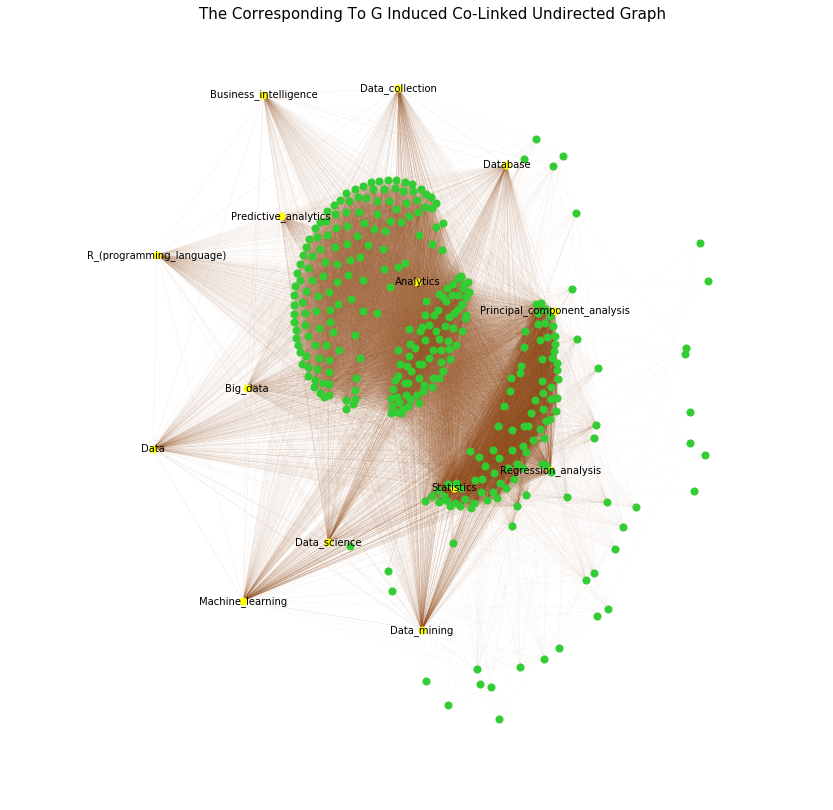

In [36]:
fig = plt.figure(figsize=(14,14))

labels ={}
for n in H.nodes():
    if n not in ftop_nodes:
        labels[n]=" "
    else:
        labels[n]=n

edge_width=[H[u][v]['weight'] for u,v in H.edges()]
edge_width1 = edge_width[:]
edge_width1=[0.05*math.log(1+e) for e in edge_width1] #can change this to other amounts like 0.5

nx.draw_networkx_edges(H, pos=posAll, width=edge_width1, edge_color="saddlebrown", alpha=.4) 
nodes = nx.draw_networkx_nodes(Ha, pos=posa1, nodelist=ca, node_size = 50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Hb, pos=posb, nodelist=so, node_size = 50, node_color="limegreen", alpha=1)
nx.draw_networkx_labels(H,pos=posAll,labels=labels,font_size=10);
name="the corresponding to G induced co-linked undirected graph"
plt.title(name.title(),fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.axis('off');

centralities dataframe for Gcout1

In [22]:

# TO REMOVE NON ASCII characters
nas=[]
for a in Gcout1.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    Gcout1.remove_node(x)
    
central_pd=pd.DataFrame(create_centralities_list(Gcout1))
node="node"
cdf = central_df(Gcout1,node,central_pd)
cdf

node    degree  closeness  \
0                                           ASCE  0.638728   0.723849   
1                               Academic_journal  0.485549   0.660305   
2                            Academic_publishing  0.026012   0.504373   
3                                        Academy  0.005780   0.367304   
4                              Actuarial_science  0.881503   0.891753   
5                                     Algorithms  0.684971   0.755459   
6               American_Statistical_Association  0.017341   0.501449   
7                                      Analytics  0.913295   0.917772   
8                                Anand_Rajaraman  0.297688   0.582492   
9                              Anomaly_detection  0.517341   0.671845   
10                               Applied_science  0.265896   0.576667   
11                                    Area_chart  0.638728   0.723849   
12                     Artificial_neural_network  0.537572   0.682446   
13                    Artificial_neural_networks  0.537572   0.682446   
14                     Association_rule_learning  0.517341   0.671845   
15                                   Autoencoder  0.517341   0.671845   
16                    Automated_machine_learning  0.517341   0.671845   
17                                         BIRCH  0.517341   0.671845   
18                                     Bar_chart  0.881503   0.891753   
19                                Basic_research  0.011561   0.497126   
20                              Bayesian_network  0.537572   0.682446   
21                               Ben_Shneiderman  0.638728   0.723849   
22                            Bifurcation_theory  0.638728   0.723849   
23                                      Big_data  0.924855   0.930108   
24                         Bonferroni_correction  0.638728   0.723849   
25                   Boosting_(machine_learning)  0.517341   0.671845   
26                         Bootstrap_aggregating  0.517341   0.671845   
27                    Bootstrapping_(statistics)  0.881503   0.891753   
28                                Boris_Galerkin  0.638728   0.723849   
29                       Boundary_element_method  0.638728   0.723849   
..                                           ...       ...        ...   
317                        Stem-and-leaf_display  0.881503   0.891753   
318        Structured_data_analysis_(statistics)  0.890173   0.898701   
319                        Structured_prediction  0.517341   0.671845   
320                                 Subharmonics  0.638728   0.723849   
321                          Supervised_learning  0.566474   0.697581   
322                       Support-vector_machine  0.537572   0.682446   
323                        System_identification  0.881503   0.891753   
324  T-distributed_stochastic_neighbor_embedding  0.517341   0.671845   
325                          Table_(information)  0.638728   0.723849   
326                               Tamara_Munzner  0.638728   0.723849   
327                 Temporal_difference_learning  0.537572   0.682446   
328                                  Test_method  0.638728   0.723849   
329                               Text_analytics  0.644509   0.728421   
330                           The_Data_Incubator  0.080925   0.514881   
331                      The_Wall_Street_Journal  0.323699   0.595525   
332                                       Theory  0.023121   0.502907   
333                          Thomas_H._Davenport  0.069364   0.512593   
334                          Turbulence_modeling  0.638728   0.723849   
335                                 Turing_award  0.005780   0.416366   
336                                 Type_1_error  0.638728   0.723849   
337                    Type_I_and_type_II_errors  0.684971   0.755459   
338                                        U-Net  0.517341   0.671845   
339             United_Nations_Development_Group  0.638728   0.723849   
340                       Uni

Top 5 Centralities for Gcout1

In [23]:
h = 5 # number of top centralities
# cdf=central_df(Gcout1,node,central_pd)
DFC={}
for c in indices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc

for k,v in DFC.items():
    print "centrality index:",k
    print v

centrality index: load
               node      load
0        Statistics  0.024614
1  Machine_learning  0.013479
2  Computer_science  0.011171
3   Wayback_Machine  0.010978
4          Database  0.010925
centrality index: Katz
                  node      Katz
0         Statistician  0.258297
1            Knowledge  0.252398
2  Interdisciplinarity  0.234376
3            Computing  0.231435
4  Information_science  0.219166
centrality index: communicability
               node  communicability
0        Statistics         0.713883
1       Data_mining         0.710358
2  Machine_learning         0.708717
3          Database         0.707326
4              Data         0.706623
centrality index: degree
               node    degree
0        Statistics  0.968208
1       Data_mining  0.956647
2  Machine_learning  0.953757
3              Data  0.939306
4          Database  0.936416
centrality index: closeness
               node  closeness
0        Statistics   0.969188
1       Data_mining   0.9

In [24]:
h = 5 # Number of top centralities
cdf=central_df(Gcout1,node,central_pd)
DFC={}
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices = [x for x in indices if x not in ['communicability', 'degree', 'current flow', 'HITS']]

for c in indices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc
top_nodes = []
for k,v in DFC.items():
#    print (v.node.tolist())
#     print ("centrality index:",k)
#     print (v)
    for w in v.node.tolist():
        if w not in top_nodes:
            top_nodes.append(w)
#     if v[0] not in top_nodes:
#         top_nodes.append(v[0])
# print (top_nodes)
list(top_nodes)

[u'Statistics',
 u'Machine_learning',
 u'Computer_science',
 u'Wayback_Machine',
 u'Database',
 u'Statistician',
 u'Knowledge',
 u'Interdisciplinarity',
 u'Computing',
 u'Information_science',
 u'Data_mining',
 u'Data',
 u'Regression_analysis',
 u'Principal_component_analysis',
 u'Linear_regression']

<b> Centralities graphs for Gcout1 </b>

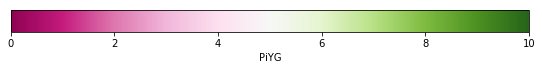

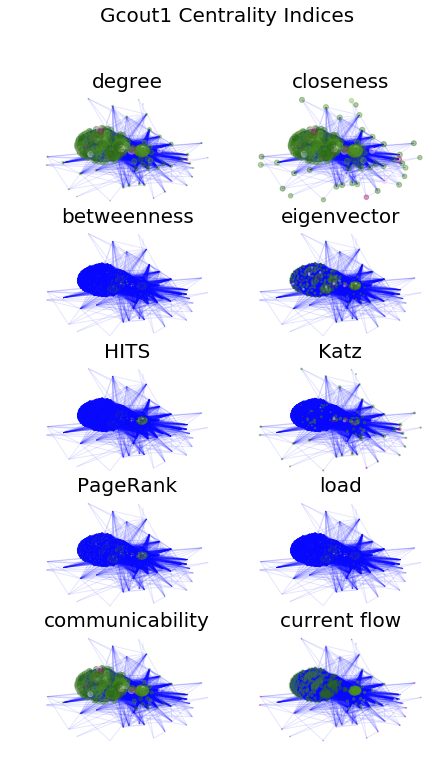

In [78]:
#adjusted sizes of nodes to 50
name="Gcout1"

pos=nx.spring_layout(Gcout1,1.)
valus=create_centralities_list(Gcout1,maxiter=2000,pphi=5,centList=[])
if isinstance(Gcout1,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(Gcout1): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
norm=norm,
orientation='horizontal')
cb1.set_label('PiYG')
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(Gcout1,pos=pos,nodelist=valus[j].keys(),
                               node_size=[50*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(Gcout1,pos=pos,edge_color='b', alpha=0.1)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

<b> centralities pairplots for Gcout1 </b>

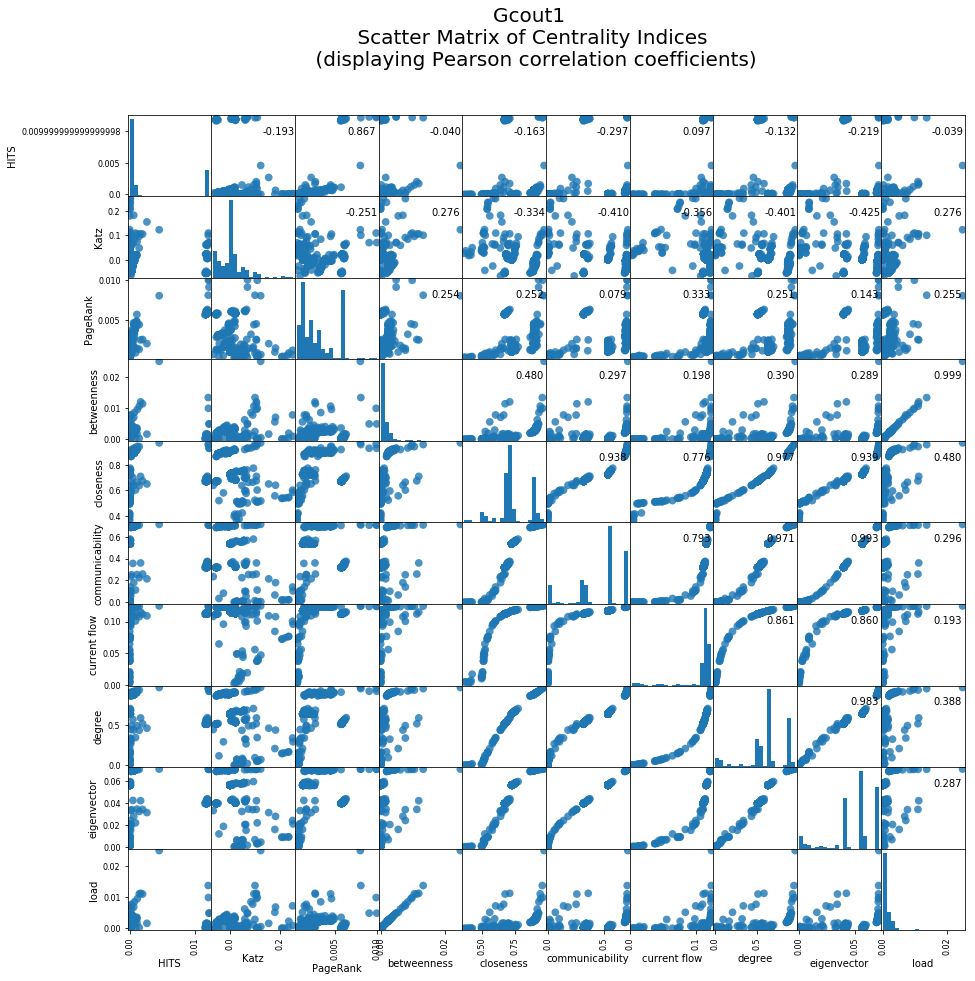

In [79]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

## Communities of the hyperlinked undirected graph

In [80]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

The graph has 3 Louvain communities and modularity coefficient equal to 0.304128090113
Community 0 with 243 nodes: [u'New_York_University', u'Particle-in-cell', u'Information_displays', u'Probability_distribution', u'Predictive_analytics', u'Data_modeling', u'Dissipative_particle_dynamics', u'Harmonics', u'Data_visualization', u'ASCE', u'Manipulation_check', u'Pie_chart', u'Reliability_(statistics)', u'Statistician', u'Lennard-Jones_potential', u'Histogram', u'Missing_data', u'Scatterplot', u'Subharmonics', u'Control_chart', u'Cognitive_bias', u'Over-the-counter_data', u'Cross-industry_standard_process_for_data_mining', u'Data_degradation', u'Measuring_instrument', u"Cronbach's_alpha", u'Education', u'R_(programming_language)', u'Numeracy', u'Data_compression', u'Multilinear_principal_component_analysis', u'Early_case_assessment', u'Data_stewardship', u'Intelligence_cycle', u'Data_quality', u'Ben_Shneiderman', u'Sensitivity_analysis', u'Outlier', u'Riemann_solver', u'Data_integration',

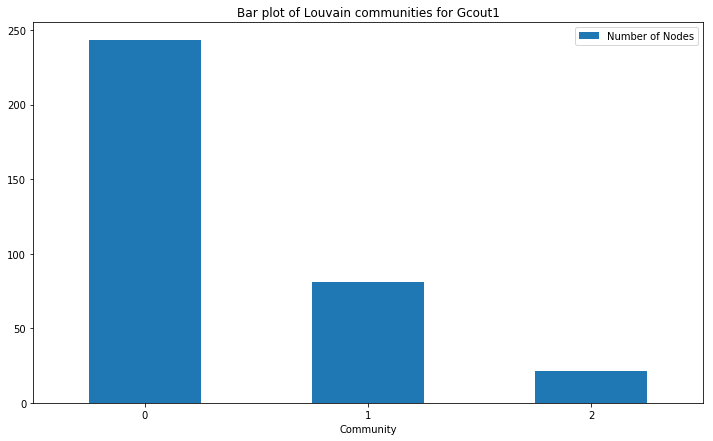

In [81]:
partition = community.best_partition(Gcout1)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, Gcout1, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

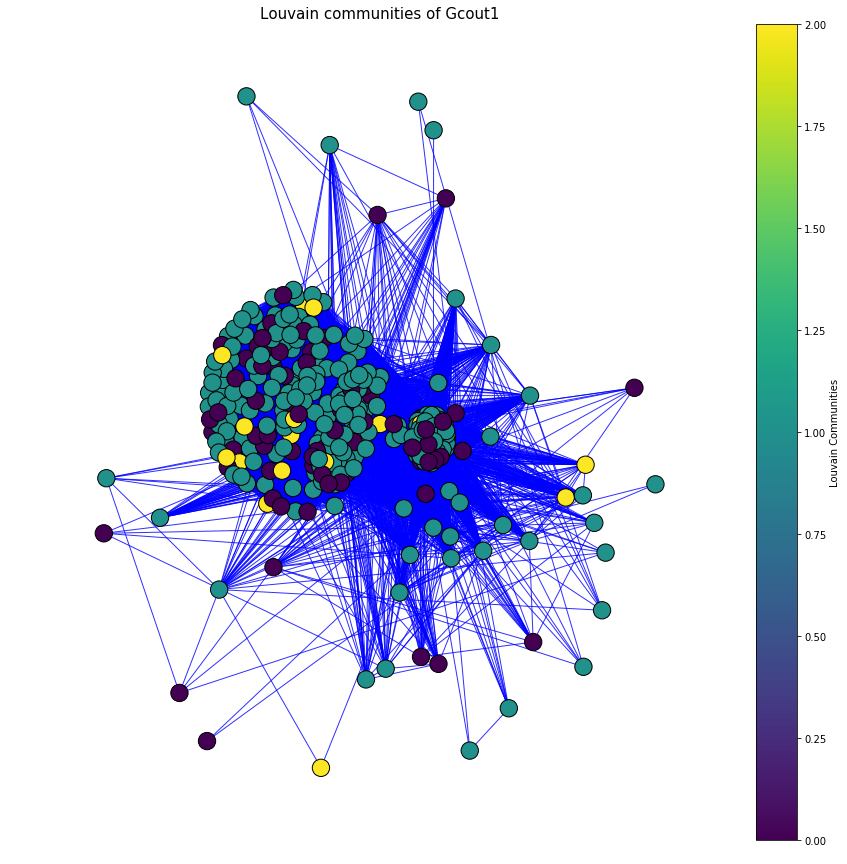

In [82]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(15,15));
node_border_color='k'
nodes = nx.draw_networkx_nodes(Gcout1, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gcout1, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -6 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
#nx.draw_networkx_labels(Gcout1, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

## Co-hyperlinking undirected graph 

In [37]:
G1=G.copy()
medgesin=[]
n_in=[n for n in G1.nodes() if G1.in_degree(n)>1]
for n in n_in:
    nn=list(G1.predecessors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesin.append((j[0],j[1]))

name="the corresponding to G induced co-linking undirected graph"
Gcin=nx.MultiGraph()
Gcin.add_edges_from(medgesin)
Gcin=nx.MultiGraph(Gcin,name=name)

Gcin1=Gcin.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcin1.edges()).items()]
Gcin1 = nx.Graph(weight)
edge_width=[Gcin1[u][v]['weight'] for u,v in Gcin1.edges()]

In [38]:
for i in weight:
    print i[2]["weight"]

11
14
1
1
2
1
4
2
3
81
1
2
5
1
2
1
1
1
27
1
1
1
1
3
5
4
1
1
2
1
81
1
1
84
1
1
2
1
2
2
1
9
2
4
1
1
2
1
1
2
3
6
81
1
2
4
82
1
81
3
1
1
34
1
1
3
1
2
1
2
2
1
1
2
1
1
3
1
2
1
1
2
1
1
1
2
1
1
2
2
4
6
3
1
1
1
25
5
2
1
1
1
1
3
2
2
1
2
1
1
2
1
1
1
1
2
1
3
81
1
1
81
2
1
1
2
2
7
1
1
2
1
1
2
1
2
1
7
13
3
1
1
1
1
81
2
1
1
6
2
81
15
2
3
1
2
2
81
26
81
1
1
5
1
1
3
2
6
4
2
1
3
81
1
2
1
6
1
1
2
2
26
81
81
5
82
81
1
81
7
1
1
3
3
2
3
2
1
1
3
2
3
1
1
2
2
81
3
2
2
6
1
1
1
2
32
32
2
27
1
4
1
2
1
12
1
4
1
4
1
1
1
1
1
81
2
2
3
4
81
1
1
81
2
1
1
2
2
2
1
2
11
1
1
3
4
2
2
1
7
9
2
3
2
1
2
4
3
2
82
1
20
81
2
34
1
2
1
1
2
1
4
1
81
1
1
5
1
4
2
2
3
81
2
9
2
4
1
1
2
1
1
1
4
2
2
1
2
1
1
10
1
1
2
3
1
1
31
1
2
1
3
1
2
3
2
1
81
1
3
1
81
2
82
1
8
2
2
1
81
1
81
1
1
1
2
1
1
10
5
1
1
1
3
81
1
1
4
1
11
2
4
13
11
1
1
2
1
3
1
3
2
1
11
1
2
1
3
2
2
2
2
1
1
7
2
1
3
1
3
1
2
2
1
2
8
80
5
2
3
3
36
81
1
1
2
3
2
2
1
25
2
2
1
1
1
3
2
1
2
2
81
1
1
1
9
11
81
1
4
5
1
2
1
27
2
82
25
2
4
3
2
1
1
1
81
3
13
1
28
34
4
4
1
3
81
12
1
4
1
1
1
2
1
1

1
1
1
81
29
2
1
2
2
4
1
1
13
26
11
1
1
1
1
12
2
3
27
1
7
1
4
7
6
1
2
2
1
1
1
1
2
2
81
1
4
1
2
1
2
7
3
1
26
81
2
25
4
1
2
4
1
3
3
1
1
1
2
82
1
3
1
1
1
3
1
1
81
1
2
1
81
5
2
1
1
1
2
34
1
2
83
1
81
81
1
12
1
1
81
81
4
1
81
1
1
1
3
1
3
2
3
5
14
2
1
1
2
2
81
4
1
3
6
1
1
1
34
4
1
1
2
5
20
2
2
1
1
2
2
37
2
1
1
2
3
1
1
1
2
3
1
81
3
1
2
1
1
81
1
2
1
1
1
2
1
1
1
4
35
1
3
11
2
1
1
27
1
2
2
1
13
2
4
4
1
1
2
1
1
1
1
4
1
2
1
3
3
1
2
1
1
14
83
9
81
2
1
27
1
1
2
82
1
11
1
1
3
1
1
6
2
12
2
2
1
3
5
6
4
6
3
1
5
3
9
1
1
1
2
2
5
81
1
1
1
3
1
4
8
1
81
1
3
2
4
1
1
3
2
8
5
81
1
1
31
1
9
3
1
1
1
1
3
2
1
1
1
2
3
81
3
2
7
1
80
1
1
3
82
1
1
1
3
4
1
1
82
1
12
16
1
3
1
3
3
1
1
2
2
1
26
7
2
1
81
81
1
10
2
81
1
2
2
81
2
1
2
7
3
83
4
2
3
1
1
81
1
1
3
81
1
5
1
1
1
2
3
1
2
1
1
8
34
5
81
1
1
11
81
2
7
81
1
5
34
1
1
81
1
5
1
4
1
1
1
1
34
1
1
4
2
2
2
3
5
1
9
2
1
2
82
3
81
1
2
1
3
2
1
1
81
2
3
2
1
3
1
1
2
3
1
1
81
1
1
1
1
2
2
1
35
1
82
81
2
1
1
3
2
1
1
2
11
3
3
1
2
2
26
39
1
34
1
1
3
1
2
1
2
2
6
1
1
1
1
1
1
1
2
1
3
1
32
2
3

1
2
2
1
1
1
1
81
1
1
2
1
8
1
11
3
1
82
1
2
1
1
2
1
2
5
81
2
1
2
1
1
2
1
3
1
1
1
1
32
2
2
3
2
34
13
81
2
4
1
80
4
1
4
1
1
2
25
1
2
1
32
1
15
1
81
1
1
1
1
2
2
2
1
2
1
3
5
5
11
81
1
2
1
4
1
1
1
81
1
2
5
2
2
2
4
2
1
4
3
82
1
26
26
26
3
1
2
3
3
1
2
2
4
1
2
7
1
82
1
2
2
2
2
2
2
2
1
1
16
2
1
1
16
3
81
1
26
2
81
4
1
1
2
1
1
8
2
2
4
6
4
1
4
1
3
1
1
1
1
1
3
81
2
2
2
2
1
81
1
1
1
1
1
1
1
5
3
1
81
3
2
3
3
1
1
81
1
1
3
2
2
1
1
12
30
81
2
3
2
1
1
1
2
2
6
1
1
2
2
3
3
2
2
1
1
1
1
3
1
1
1
7
82
1
1
2
1
1
2
4
1
4
1
82
82
83
2
1
4
13
4
6
4
3
5
1
1
2
2
1
1
11
1
1
81
5
1
1
2
1
2
4
1
1
2
1
2
1
1
1
1
81
1
1
2
2
1
4
1
1
1
2
1
2
1
4
5
2
1
1
1
1
2
1
2
11
1
1
1
2
3
2
2
1
1
2
81
2
1
11
1
1
2
1
2
1
1
1
2
2
81
1
1
4
3
14
2
1
10
1
1
1
82
1
2
81
2
1
1
3
10
1
2
1
81
81
1
1
3
2
2
1
1
2
2
1
3
82
2
7
3
2
1
1
1
4
81
1
10
1
1
1
3
1
81
2
1
1
81
1
1
1
1
1
1
1
1
1
4
2
3
3
2
1
1
1
9
2
1
1
2
7
2
1
1
2
1
5
12
3
3
2
1
5
2
2
81
2
1
1
1
2
2
26
11
1
1
1
26
1
1
1
81
1
1
1
25
2
5
1
2
2
1
1
1
1
2
2
1
1
1
26
3
2
1
2
3
82
2
8
2
1
1
1
81
8

3
2
83
2
1
1
1
3
2
1
3
2
4
1
1
1
81
1
4
1
2
2
1
1
81
1
2
1
1
81
27
4
1
32
81
2
4
1
26
1
2
1
2
1
1
9
1
2
5
12
2
1
1
5
81
1
80
5
1
3
2
1
26
81
2
3
1
1
3
1
2
12
2
3
8
1
81
2
1
4
3
44
1
2
2
81
81
1
2
26
3
1
2
2
1
1
1
2
2
4
1
1
2
2
2
81
1
1
1
2
1
81
33
3
13
10
1
1
1
2
2
1
2
81
3
5
1
2
2
2
1
3
2
4
4
1
2
1
1
2
5
2
1
6
2
2
1
1
4
2
2
2
1
4
19
1
14
1
1
3
1
1
3
1
1
2
1
1
6
1
1
1
1
3
1
3
3
2
80
3
25
1
6
1
1
1
3
1
1
1
1
1
4
1
1
2
6
2
2
5
2
2
81
2
1
2
1
1
11
5
1
1
1
3
25
1
3
1
23
2
1
1
2
1
3
2
4
1
1
5
2
83
1
1
1
80
2
1
2
2
1
82
2
1
2
2
1
3
2
1
25
1
1
2
1
1
1
81
1
35
2
19
1
2
3
1
1
1
1
81
3
3
1
2
1
1
1
1
1
2
1
2
81
1
11
4
2
81
1
1
81
2
1
1
11
2
3
1
82
2
1
3
1
1
3
81
81
2
80
3
1
3
2
9
3
2
81
1
2
2
3
1
1
3
1
2
1
3
1
4
1
2
1
3
25
1
81
4
1
1
1
2
6
9
35
1
4
1
3
3
1
1
1
1
3
8
1
2
1
81
1
4
1
3
1
5
26
2
1
81
1
3
2
2
1
1
3
1
8
1
5
3
2
1
10
34
2
11
40
1
2
13
14
81
81
2
81
3
81
10
25
2
2
1
1
1
1
25
12
1
81
2
4
1
8
1
1
25
1
1
2
8
3
81
35
3
3
4
1
2
2
1
3
2
2
1
30
4
1
1
1
81
4
2
2
29
2
3
2
81
3
1
13
11
5
3
2
26
1


3
81
2
1
41
2
80
3
2
3
1
5
1
25
4
8
1
81
2
7
2
1
7
1
1
3
1
1
1
34
2
1
1
2
3
2
26
3
1
1
1
1
2
81
3
1
3
1
1
1
1
1
5
2
2
34
1
1
1
1
2
3
2
107
1
6
4
2
34
2
1
1
81
1
5
3
9
3
3
2
1
7
1
82
11
1
2
80
81
7
2
1
1
1
1
11
2
1
1
3
1
1
5
1
1
2
2
4
1
26
1
1
1
81
2
2
12
2
3
1
81
2
7
1
1
3
1
1
1
1
3
1
2
1
5
13
1
1
1
5
2
1
1
11
1
2
1
1
1
1
3
1
1
1
82
3
1
82
1
4
10
4
1
26
2
4
1
8
1
12
2
10
1
2
2
2
81
1
1
2
2
12
81
2
2
1
3
81
83
2
2
81
1
3
1
2
81
1
1
9
1
81
2
1
1
1
3
3
1
1
2
2
2
1
9
1
3
11
3
12
2
2
6
10
2
6
1
1
1
1
2
1
81
1
1
3
3
1
3
1
4
1
7
1
2
25
10
81
2
2
2
2
2
3
2
81
4
1
2
1
6
2
2
9
2
81
1
2
1
12
1
9
2
1
81
1
2
6
1
1
1
2
1
3
27
2
2
1
82
26
3
1
3
1
33
1
1
81
1
2
81
3
1
1
2
2
2
1
1
7
2
1
1
1
1
1
1
1
1
4
13
3
3
1
1
1
1
2
81
2
1
3
1
2
2
1
2
81
8
3
5
8
2
2
1
82
81
5
5
1
3
3
10
1
1
6
1
1
81
2
4
2
9
8
3
5
1
2
2
5
1
81
1
1
1
2
1
2
81
2
1
81
81
1
1
2
2
1
2
1
5
1
81
1
1
5
26
2
1
1
2
1
2
1
2
1
2
1
3
6
2
1
2
2
1
4
1
2
1
1
1
1
1
1
1
2
1
2
4
2
3
2
1
1
3
1
1
1
5
1
2
1
1
1
1
1
8
3
1
1
2
2
1
1
2
3
1
4
2
1
3
1
2
1
1
5


1
1
11
3
1
81
1
13
26
82
34
7
1
3
3
1
26
10
1
3
81
2
4
1
6
1
2
1
2
25
13
1
1
1
1
26
27
1
1
6
1
11
8
1
1
1
11
1
1
1
9
19
1
2
1
1
80
1
4
81
9
1
81
2
1
3
2
25
1
12
1
4
1
1
3
1
1
1
1
26
1
1
82
1
1
1
3
1
2
5
2
3
3
12
3
81
1
1
2
13
3
2
20
1
1
4
1
81
2
4
3
81
1
3
3
11
1
2
1
5
1
1
1
1
2
1
3
25
1
1
34
1
1
2
3
9
1
1
2
3
12
1
1
1
81
83
2
2
3
3
5
1
1
4
1
1
1
81
1
7
2
4
1
4
1
3
1
25
81
1
11
1
1
2
2
1
1
82
9
3
5
1
26
4
1
81
1
1
1
2
14
2
1
1
1
1
1
1
13
1
2
81
1
9
2
1
11
3
1
1
1
2
1
82
81
81
1
1
2
3
25
2
81
1
1
2
1
5
1
1
2
1
2
1
1
1
1
1
81
2
2
1
1
82
1
3
1
26
81
2
1
81
1
6
2
1
26
1
1
4
1
4
3
3
2
1
1
1
4
81
82
25
3
3
1
1
1
1
2
1
1
81
81
3
2
1
81
3
1
81
1
81
5
2
2
1
81
2
6
14
1
1
2
1
4
3
1
2
82
2
4
1
2
1
3
11
82
4
1
4
1
26
33
1
1
81
82
1
2
81
1
1
2
4
1
1
2
1
3
3
3
5
12
1
2
1
1
1
81
1
1
1
11
1
1
3
3
2
2
2
5
2
4
1
1
7
1
1
1
1
1
1
27
1
1
6
81
2
4
1
2
35
6
1
4
3
1
1
9
81
1
1
1
3
4
10
1
4
26
1
1
1
4
26
1
1
1
2
2
1
11
81
27
1
3
1
7
81
3
1
58
2
2
4
1
9
1
81
1
81
7
1
4
1
8
2
1
2
81
1
1
3
1
25
81
5
1
11
81
1
81


1
81
3
2
1
9
26
81
2
5
1
3
1
80
1
34
2
3
5
1
25
1
2
3
81
1
2
3
3
1
1
2
1
1
1
1
1
14
1
1
1
81
2
1
1
1
2
5
11
81
1
1
1
1
25
7
81
3
2
1
1
1
1
81
1
3
4
4
1
14
1
2
2
1
1
1
1
1
1
1
1
3
81
1
1
1
1
1
1
5
81
5
1
2
1
2
2
1
1
12
8
1
1
1
1
1
1
2
82
1
5
81
81
2
5
1
1
1
1
4
1
9
2
2
2
4
2


In [39]:
print "Gcin is %s with %i nodes and %i edges" %(str(Gcin),len(Gcin1.nodes()),len(Gcin1.edges()))
if nx.is_weighted(Gcin1)==True:
    print "Gcin is a weighted undirected graph"
else:
    print "Gcin is an unweighted undirected graph"
if nx.is_connected(Gcin)==True:
    print "Gcin is a connected graph"
else:
    print "Gcin is a disconnected graph and it has",nx.number_connected_components(Gcin1),"connected components"    
print "The density of Gcin is %.3f" %nx.density(Gcin)
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcin.edges()).items()]
maxweight=max([i[2]["weight"] for i in weight])
# maxweight 
ndensity = nx.density(Gcin)/maxweight
ndensity
print "The normalized density of Gcin is %.3f" %ndensity
# type(nx.density(Gcin))
# type(maxweight)

Gcin is the corresponding to G induced co-linking undirected graph with 347 nodes and 25468 edges
Gcin is a weighted undirected graph
Gcin is a connected graph
The density of Gcin is 4.764
The normalized density of Gcin is 0.045


In [40]:
#to determine the top nodes
x = dict(nx.degree(Gcin1))
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
for k,v in sorted_x:
    print k,v

Data_Analysis 318
Data_mining 301
Database 281
Statistics 276
Glossary_of_artificial_intelligence 271
Big_data 271
Machine_learning 270
Data 269
Exploratory_data_analysis 268
Computational_physics 266
Data_visualization 262
Interactive_data_visualization 262
Data_Presentation_Architecture 262
Regression_analysis 261
Computing 260
Reliability_(statistics) 259
Reinforcement_learning 259
Numerical_analysis 259
Statistical_graphics 258
Computer_science 257
Datalogy 257
Information 253
Infographic 253
Cluster_analysis 253
Misleading_graph 253
Data_analysis 250
Data_science 250
Principal_component_analysis 249
Information_design 249
Analytics 246
Ensemble_learning 244
Monte_Carlo_method 244
Decision_tree_learning 242
Naive_Bayes_classifier 242
Probability_distribution 240
Inferential_statistics 237
Statistical_inference 237
Wavelet 237
Statistical_hypothesis_testing 236
Hypothesis_testing 236
Actuarial_science 235
Data_collection 235
Linear_regression 234
Boxplot 233
Propensity_score_matchin

In [41]:
ftop_nodes= [u'Data_Analysis',
 u'Data_mining',
 u'Database',
 u'Statistics',
 u'Glossary_of_artificial_intelligence',
 u'Big_data',
 u'Machine_learning',
 u'Data',
 u'Exploratory_data_analysis',
 u'Computational_physics',
 u'Data_visualization',
 u'Interactive_data_visualization',
 u'Data_Presentation_Architecture',
 u'Regression_analysis',
 u'Computing']


In [44]:
H=Gcin1.copy()
nas=[]
for a in H.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    H.remove_node(x)
ca=ftop_nodes
so=[n for n in list(H.nodes()) if n not in ca]
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posa=graphviz_layout(Ha)  # nx.circular_layout(Ha)
posb=graphviz_layout(Hb) #nx.spring_layout(Hb,k=2.5) #

d=2.5 #can play around 3
xd=-50. #can play around -200
yd=-10. #can play around -100

posa1={}
for k,v in posa.items(): 
    vv=list(v)
    vv[0] = xd+vv[0]*d
    vv[1] = yd+vv[1]*d
    posa1[k]=tuple(vv)
posAll=dict(posb.items()+posa1.items()+[(k,posb[k]+posa1[k]) for k in set(posa1)&set(posb)])

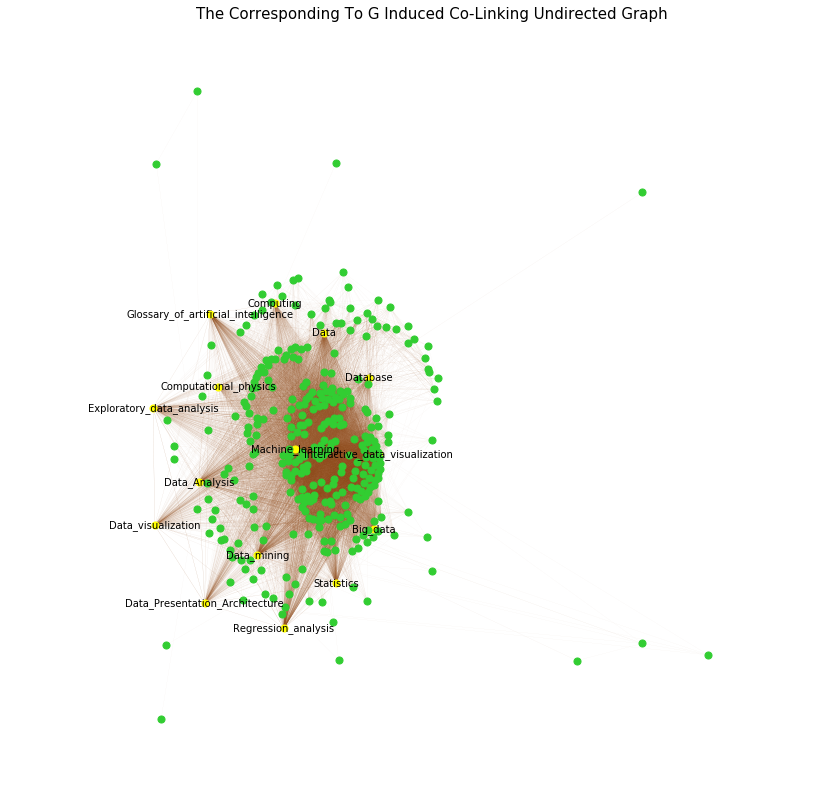

In [45]:
fig = plt.figure(figsize=(14,14))

labels ={}
for n in H.nodes():
    if n not in ftop_nodes:
        labels[n]=" "
    else:
        labels[n]=n

edge_width=[H[u][v]['weight'] for u,v in H.edges()]
edge_width1 = edge_width[:]
edge_width1=[0.05*math.log(1+e) for e in edge_width1] #can change this to other amounts like 0.5

nx.draw_networkx_edges(H, pos=posAll, width=edge_width1, edge_color="saddlebrown", alpha=.4) 
nodes = nx.draw_networkx_nodes(Ha, pos=posa1, nodelist=ca, node_size = 50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Hb, pos=posb, nodelist=so, node_size = 50, node_color="limegreen", alpha=1)
nx.draw_networkx_labels(H,pos=posAll,labels=labels,font_size=10);
name="the corresponding to G induced co-linking undirected graph"
plt.title(name.title(),fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.axis('off');

<b> Centralities Dataframe for Gcin1 </b>

In [46]:

# TO REMOVE NON ASCII characters
nas=[]
for a in Gcin1.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    Gcin1.remove_node(x)

central_pd=pd.DataFrame(create_centralities_list(Gcin1))
node="node"
central_df(Gcin1,node,central_pd)

node    degree  closeness  \
0                                           ASCE  0.005917   0.480797   
1                               Academic_journal  0.005917   0.388506   
2                            Academic_publishing  0.177515   0.528125   
3                                        Academy  0.115385   0.509804   
4                              Actuarial_science  0.677515   0.752784   
5                                     Algorithms  0.440828   0.640152   
6               American_Statistical_Association  0.360947   0.607914   
7                                      Analytics  0.713018   0.775229   
8                                Anand_Rajaraman  0.088757   0.502229   
9                              Anomaly_detection  0.576923   0.701245   
10                               Applied_science  0.384615   0.616788   
11                                    Area_chart  0.384615   0.616788   
12                     Artificial_neural_network  0.582840   0.704167   
13                    Artificial_neural_networks  0.582840   0.704167   
14                     Association_rule_learning  0.576923   0.701245   
15                                   Autoencoder  0.576923   0.701245   
16                    Automated_machine_learning  0.576923   0.701245   
17                                     Bar_chart  0.636095   0.730022   
18                                Basic_research  0.109467   0.505232   
19                              Bayesian_network  0.559172   0.692623   
20                               Ben_Shneiderman  0.218935   0.558678   
21                            Bifurcation_theory  0.059172   0.510574   
22                                      Big_data  0.784024   0.820388   
23                         Bonferroni_correction  0.363905   0.609009   
24                   Boosting_(machine_learning)  0.662722   0.746137   
25                         Bootstrap_aggregating  0.576923   0.701245   
26                    Bootstrapping_(statistics)  0.363905   0.609009   
27                                Boris_Galerkin  0.085799   0.518405   
28                       Boundary_element_method  0.050296   0.491279   
29                                       Boxplot  0.671598   0.749446   
..                                           ...       ...        ...   
309                                 Statistician  0.535503   0.680080   
310                                   Statistics  0.798817   0.830467   
311                        Stem-and-leaf_display  0.642012   0.733189   
312        Structured_data_analysis_(statistics)  0.517751   0.671968   
313                        Structured_prediction  0.576923   0.701245   
314                                 Subharmonics  0.002959   0.480114   
315                          Supervised_learning  0.576923   0.701245   
316                       Support-vector_machine  0.585799   0.705637   
317                        System_identification  0.671598   0.749446   
318  T-distributed_stochastic_neighbor_embedding  0.576923   0.701245   
319                          Table_(information)  0.331361   0.597173   
320                               Tamara_Munzner  0.218935   0.558678   
321                 Temporal_difference_learning  0.624260   0.725322   
322                                  Test_method  0.118343   0.526480   
323                               Text_analytics  0.538462   0.682828   
324                           The_Data_Incubator  0.408284   0.625926   
325                      The_Wall_Street_Journal  0.100592   0.502976   
326                                       Theory  0.428994   0.635338   
327                          Thomas_H._Davenport  0.017751   0.471409   
328                          Turbulence_modeling  0.038462   0.490566   
329                                 Turing_award  0.384615   0.616788   
330                                 Type_1_error  0.636095   0.730022   
331                    Type_I_and_type_II_errors  0.636095   0.730022   
332                          

<b> Top 5 Centralities fo Gcin1 </b>

In [47]:
h = 5 # number of top centralities
cdf=central_df(Gcin1,node,central_pd)
DFC={}
for c in indices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc

for k,v in DFC.items():
    print "centrality index:",k
    print v

centrality index: load
            node      load
0  Data_Analysis  0.076799
1    Data_mining  0.028043
2       Database  0.021953
3       Big_data  0.014740
4     Statistics  0.013298
centrality index: Katz
                         node      Katz
0    Scientific_visualization  0.182403
1            Nonlinear_system  0.178795
2  Morse/Long-range_potential  0.150929
3              Riemann_solver  0.150929
4             Morse_potential  0.150929
centrality index: communicability
                                  node  communicability
0                        Data_Analysis         0.734534
1                          Data_mining         0.717069
2                                 Data         0.704073
3            Exploratory_data_analysis         0.703250
4  Glossary_of_artificial_intelligence         0.702182
centrality index: degree
                                  node    degree
0                        Data_Analysis  0.917160
1                          Data_mining  0.872781
2         

In [48]:
h = 5 # Number of top centralities
cdf=central_df(Gcin1,node,central_pd)
DFC={}
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices = [x for x in indices if x not in ['communicability', 'degree', 'current flow', 'HITS']]

for c in indices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc
top_nodes = []
for k,v in DFC.items():
#    print (v.node.tolist())
#     print ("centrality index:",k)
#     print (v)
    for w in v.node.tolist():
        if w not in top_nodes:
            top_nodes.append(w)
#     if v[0] not in top_nodes:
#         top_nodes.append(v[0])
# print (top_nodes)
list(top_nodes)

[u'Data_Analysis',
 u'Data_mining',
 u'Database',
 u'Big_data',
 u'Statistics',
 u'Scientific_visualization',
 u'Nonlinear_system',
 u'Morse/Long-range_potential',
 u'Riemann_solver',
 u'Morse_potential',
 u'Data',
 u'Exploratory_data_analysis',
 u'Glossary_of_artificial_intelligence',
 u'Principal_component_analysis',
 u'Regression_analysis',
 u'Machine_learning',
 u'Pattern_recognition']

<b> Centralities graphs for Gcin1 </b>

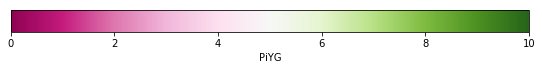

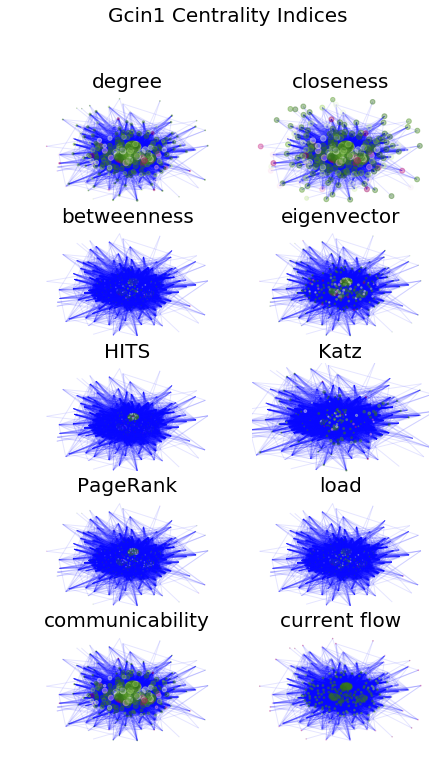

In [103]:
#adjusted sizes of nodes to 50
name="Gcin1"

pos=nx.spring_layout(Gcin1,1.)
valus=create_centralities_list(Gcin1,maxiter=2000,pphi=5,centList=[])
if isinstance(Gcin1,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(Gcin1): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
norm=norm,
orientation='horizontal')
cb1.set_label('PiYG')
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(Gcin1,pos=pos,nodelist=valus[j].keys(),
                               node_size=[50*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(Gcin1,pos=pos,edge_color='b', alpha=0.1)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

<b> centralities pairplots for Gcin1 </b>

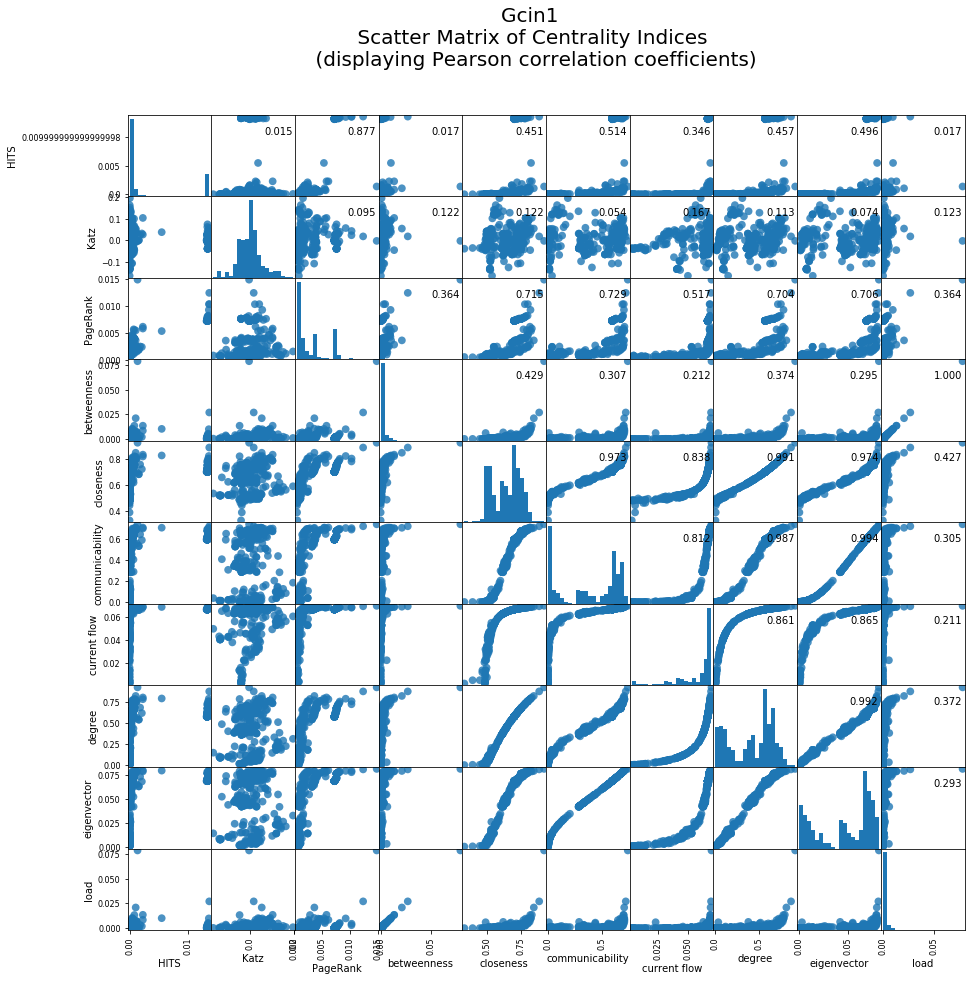

In [104]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

## Communities of the hyperlinking undirected graph 

The graph has 2 Louvain communities and modularity coefficient equal to 0.251717139821
Community 0 with 274 nodes: [u'C.F._Jeff_Wu', u'Particle-in-cell', u'Information_displays', u'Probability_distribution', u'Predictive_analytics', u'Data_modeling', u'Dissipative_particle_dynamics', u'Harmonics', u'Data_visualization', u'ASCE', u'Manipulation_check', u'Gideon_J._Mellenbergh', u'Extract,_transform,_load', u'Reliability_(statistics)', u'Statistician', u'Lennard-Jones_potential', u'Histogram', u'Graduate_school', u'Missing_data', u'Scatterplot', u'Subharmonics', u'Industry', u'Control_chart', u'Cognitive_bias', u'Over-the-counter_data', u'Cross-industry_standard_process_for_data_mining', u'Data_degradation', u'Measuring_instrument', u"Cronbach's_alpha", u'DJ_Patil', u'Computational_science', u'University_of_Essex', u'R_(programming_language)', u'Numeracy', u'Data_compression', u'Multilinear_principal_component_analysis', u'Bias\u2013variance_dilemma', u'Data_stewardship', u'Data_quality'

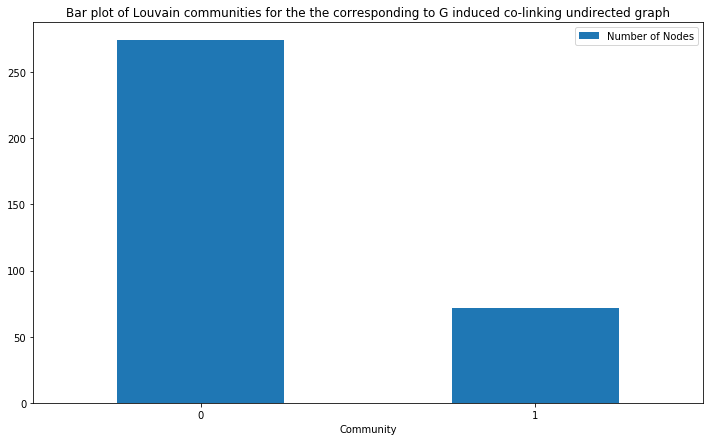

In [23]:
partition = community.best_partition(Gcin1)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, Gcin1, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for the %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

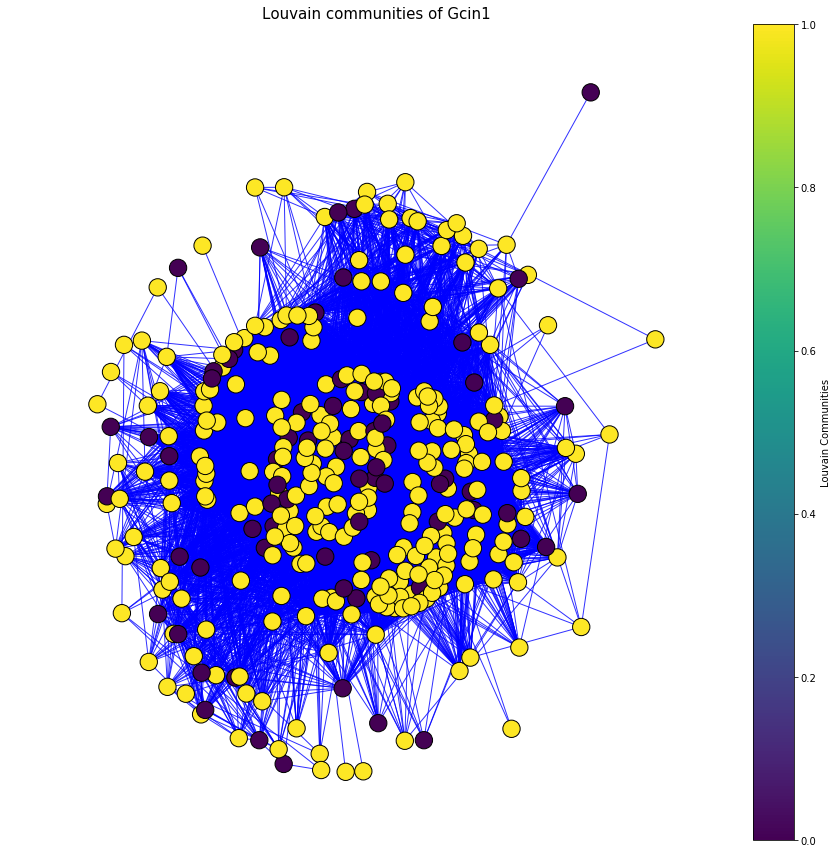

In [26]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(15,15));
node_border_color='k'
nodes = nx.draw_networkx_nodes(Gcin1, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gcin1, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -7 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gcin1, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

## Largest Strongly Connected Component

In [49]:
largest = max(nx.strongly_connected_components(G), key=len)
len(largest)
GLCC = G.subgraph(largest)
print len(GLCC.nodes()),len(GLCC.edges())

318 9538


In [50]:
#Description of strongly connected component

if GLCC.is_multigraph()==True:
    print "The largest strongly connected component of G is a multigraph"
else:
    print "The largest strongly connected component of G is a simple graph"
if nx.is_weighted(GLCC)==True:
    print "The largest strongly connected component of G is a weighted graph"
else:
    print "The largest strongly connected component of G is an unweighted graph"
if GLCC.is_directed()==True:
    print "The largest strongly connected component of G is a directed graph"
else:
    print "The largest connected component of G is an undirected graph"    
if nx.is_bipartite(GLCC)==True:
    print "The largest strongly connected component of G is a bipartite graph"
else:
    print "The largest strongly connected component of G is not a bipartite graph"    
if nx.is_tree(GLCC)==True:
    print "The largest strongly connected component of G is a tree"
else:
    print "The largest strongly connected component of G is not a tree"    
if GLCC.is_directed()==False:
    if nx.is_connected(GLCC)==True:
        print "The largest connected component of G is a connected graph"
    else:
        print "The largest connected component of G is a disconnected graph and it has",nx.number_connected_components(GLCC),"connected components"    
else:
    if nx.is_strongly_connected(GLCC)==True:
        print "The largest strongly connected component of G is a strongly connected graph"
    else:
        print "The largest strongly connected component of G is not strongly connected and it has",nx.number_strongly_connected_components(GLCC),"strongly connected components"
    if nx.is_weakly_connected(GLCC)==True:
        print "The largest strongly connected component of G is a weakly connected graph"
    else:
        print "The largest strongly connected component of G is not weakly connected and it has",nx.number_weakly_connected_components(GLCC),"weakly connected components"    
if len(list(nx.isolates(GLCC)))>0:
    print "The largest strongly connected component of G has",len(list(nx.isolates(GLCC))),"isolates"
else:
    print "The largest strongly connected component of G has no isolates"
print "The density of the largest strongly connected component of G is %.3f" %nx.density(GLCC)      
print "The largest strongly connected component of G has reciprocity = ", nx.reciprocity(GLCC)

The largest strongly connected component of G is a simple graph
The largest strongly connected component of G is an unweighted graph
The largest strongly connected component of G is a directed graph
The largest strongly connected component of G is not a bipartite graph
The largest strongly connected component of G is not a tree
The largest strongly connected component of G is a strongly connected graph
The largest strongly connected component of G is a weakly connected graph
The largest strongly connected component of G has no isolates
The density of the largest strongly connected component of G is 0.095
The largest strongly connected component of G has reciprocity =  0.720696162718


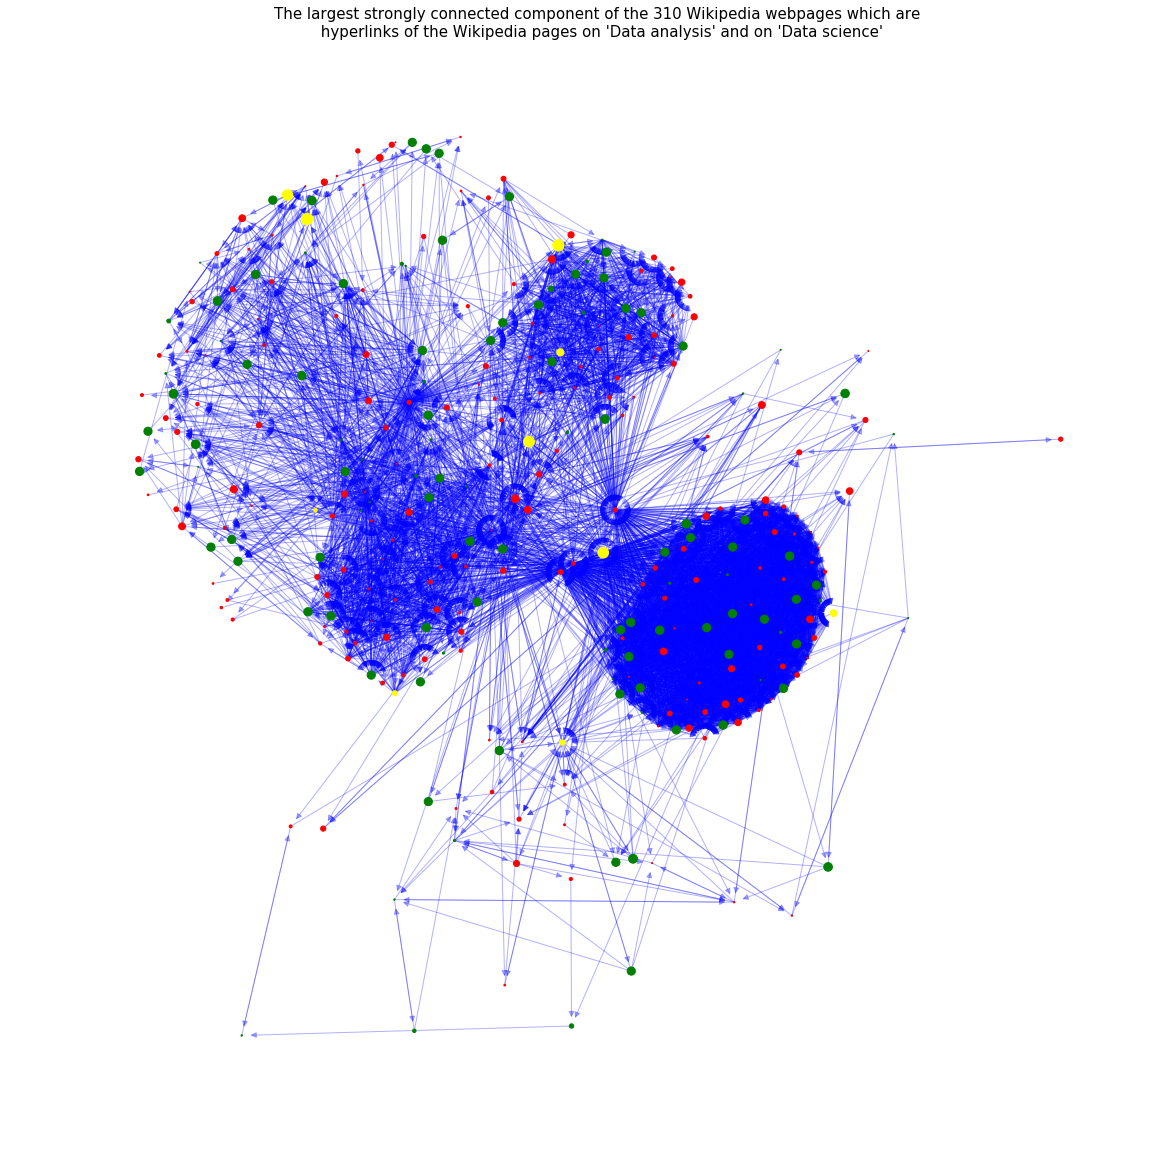

In [52]:
#Graphviz_Layout
uGLCC = nx.DiGraph(GLCC) #unfreeze graph
# Detect and remove nodes with non-ascii characters
nas=[]
for a in uGLCC.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
# GLCC.remove_nodes_from(nas)
for x in nas:
    uGLCC.remove_node(x)


pos=graphviz_layout(uGLCC)

#pos=nx.spring_layout(uGLCC,1.)#will handle non-ascii characters

type={}
for n in uGLCC.nodes():
    if n in p1 and n not in p2:
        type[n]='r'
    elif n in p2 and n not in p1:
        type[n]='g'
    else:
        type[n]='yellow'
plt.figure(figsize=(20,20));
nodes = nx.draw_networkx_nodes(uGLCC, pos, node_color=type.values(),node_size=dict(uGLCC.in_degree()).values()) #, alpha=0.2)
nx.draw_networkx_edges(uGLCC, pos,arrowsize=12, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The largest strongly connected component of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia pages on '%s' and on '%s'" %(len(uGLCC.nodes()),page1.title,page2.title)
plt.title(ss,fontsize=15);
# plt.margins(x=0.3, y=0) 

largest, strongly connected component, centralities data frame

In [55]:
central_pd=pd.DataFrame(create_centralities_list(GLCC))
node="node"
central_df(GLCC,node,central_pd)

node  out_degree  in_degree  \
0                               Academic_journal    0.003155   0.028391   
1                            Academic_publishing    0.012618   0.006309   
2                              Actuarial_science    0.085174   0.116719   
3                                     Adèr,_H.J.    0.006309   0.003155   
4                                     Algorithms    0.012618   0.009464   
5                                      Analytics    0.041009   0.041009   
6                                Anand_Rajaraman    0.003155   0.015773   
7                              Anomaly_detection    0.252366   0.220820   
8                                Applied_science    0.015773   0.015773   
9                                     Area_chart    0.015773   0.031546   
10                     Artificial_neural_network    0.258675   0.227129   
11                    Artificial_neural_networks    0.255521   0.223975   
12                     Association_rule_learning    0.252366   0.220820   
13                                   Autoencoder    0.252366   0.220820   
14                    Automated_machine_learning    0.252366   0.220820   
15                                     Bar_chart    0.085174   0.145110   
16                                Basic_research    0.003155   0.003155   
17                              Bayesian_network    0.018927   0.227129   
18                               Ben_Shneiderman    0.037855   0.056782   
19                         Bias–variance_dilemma    0.018927   0.223975   
20                            Bifurcation_theory    0.006309   0.015773   
21                                      Big_data    0.078864   0.094637   
22                         Bonferroni_correction    0.009464   0.003155   
23                   Boosting_(machine_learning)    0.037855   0.223975   
24                         Bootstrap_aggregating    0.252366   0.220820   
25                    Bootstrapping_(statistics)    0.009464   0.116719   
26                                Boris_Galerkin    0.006309   0.028391   
27                       Boundary_element_method    0.018927   0.041009   
28                                       Boxplot    0.100946   0.031546   
29                            Business_analytics    0.025237   0.009464   
..                                           ...         ...        ...   
288                                 Statistician    0.034700   0.006309   
289                                   Statistics    0.189274   0.375394   
290                        Stem-and-leaf_display    0.091483   0.135647   
291        Structured_data_analysis_(statistics)    0.006309   0.012618   
292                        Structured_prediction    0.252366   0.220820   
293                                 Subharmonics    0.003155   0.006309   
294                          Supervised_learning    0.255521   0.236593   
295                       Support-vector_machine    0.255521   0.223975   
296                        System_identification    0.085174   0.113565   
297  T-distributed_stochastic_neighbor_embedding    0.252366   0.220820   
298                          Table_(information)    0.044164   0.059937   
299                               Tamara_Munzner    0.037855   0.056782   
300                 Temporal_difference_learning    0.252366   0.223975   
301                                  Test_method    0.006309   0.006309   
302                               Text_analytics    0.028391   0.012618   
303                           The_Data_Incubator    0.009464   0.006309   
304                      The_Wall_Street_Journal    0.003155   0.006309   
305                                       Theory    0.006309   0.003155   
306                          Thomas_H._Davenport    0.006309   0.009464   
307                          Turbulence_modeling    0.003155   0.025237   
308                                 Turing_award    0.018927   0.003155   
309                                 Type_1_error    0.088328   0.0031

In [56]:
h = 5 # number of top centralities
cgdf=central_df(GLCC,node,central_pd)
DFCG={}
for c in dindices:
    dfcg=cgdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFCG[c]=dfcg

for k,v in DFCG.items():
    print "centrality index:",k
    print v

centrality index: load
                           node      load
0                   Data_mining  0.206332
1                    Statistics  0.147954
2              Machine_learning  0.098184
3                 Data_Analysis  0.096170
4  Principal_component_analysis  0.082953
centrality index: Katz
                            node      Katz
0                Data_collection  0.241838
1                  Data_curation  0.148428
2                    Data_mining  0.146501
3                   Missing_data  0.144310
4  Cross-validation_(statistics)  0.142665
centrality index: HITS_hubs
                           node  HITS_hubs
0                   Data_mining   0.013363
1  Principal_component_analysis   0.013327
2           Regression_analysis   0.013261
3              Machine_learning   0.013208
4           Pattern_recognition   0.013070
centrality index: out_degree
                           node  out_degree
0                 Data_Analysis    0.630915
1                   Data_mining    0.4574


<b> Most Important Nodes Of Largest, Strongly Connected Component based on Centralities </b>

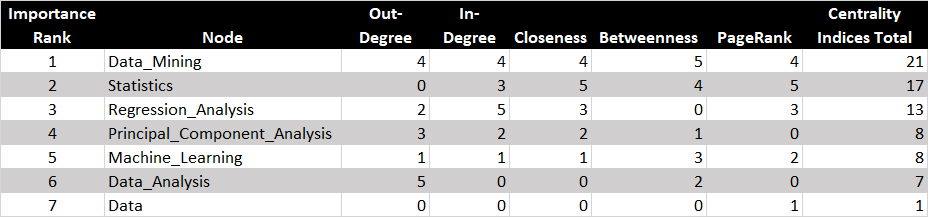

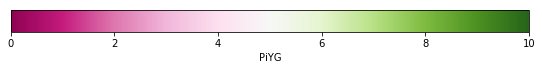

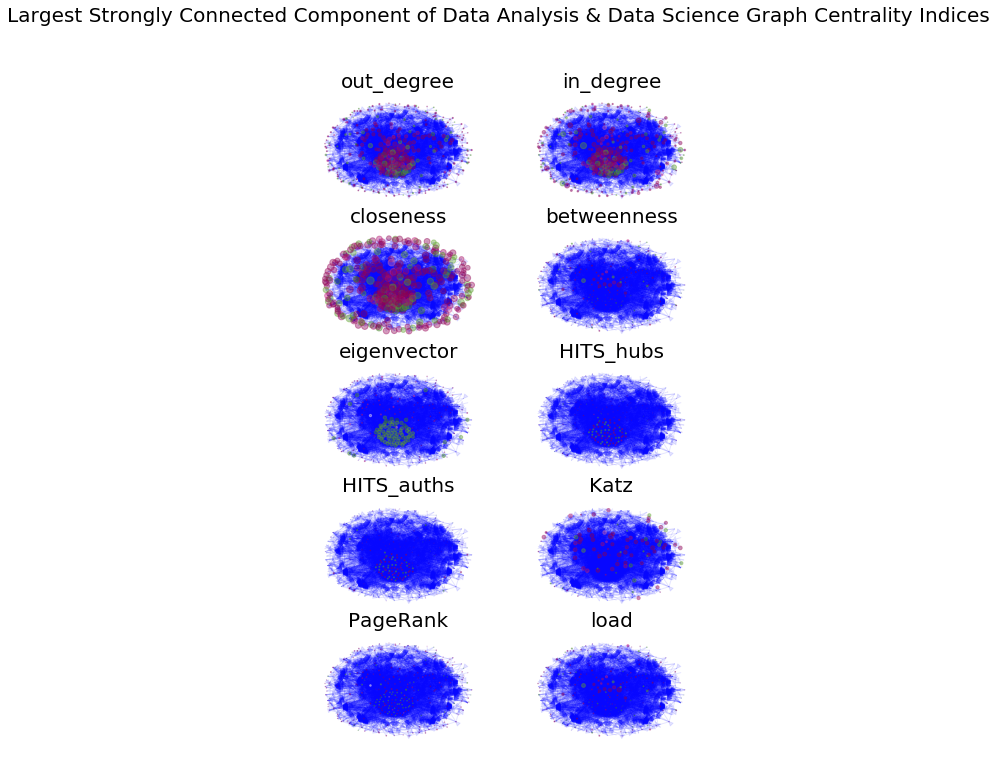

In [15]:
#adjusted sizes of nodes to 100
name="Largest Strongly Connected Component of Data Analysis & Data Science Graph"

pos=nx.spring_layout(GLCC,1.)
valus=create_centralities_list(GLCC,maxiter=2000,pphi=5,centList=[])
if isinstance(GLCC,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(GLCC): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
norm=norm,
orientation='horizontal')
cb1.set_label('PiYG')

plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(GLCC,pos=pos,nodelist=valus[j].keys(),
                               node_size=[100*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #Reds
    nx.draw_networkx_edges(GLCC,pos=pos,edge_color='b', alpha=0.1)#adjust edge size here
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

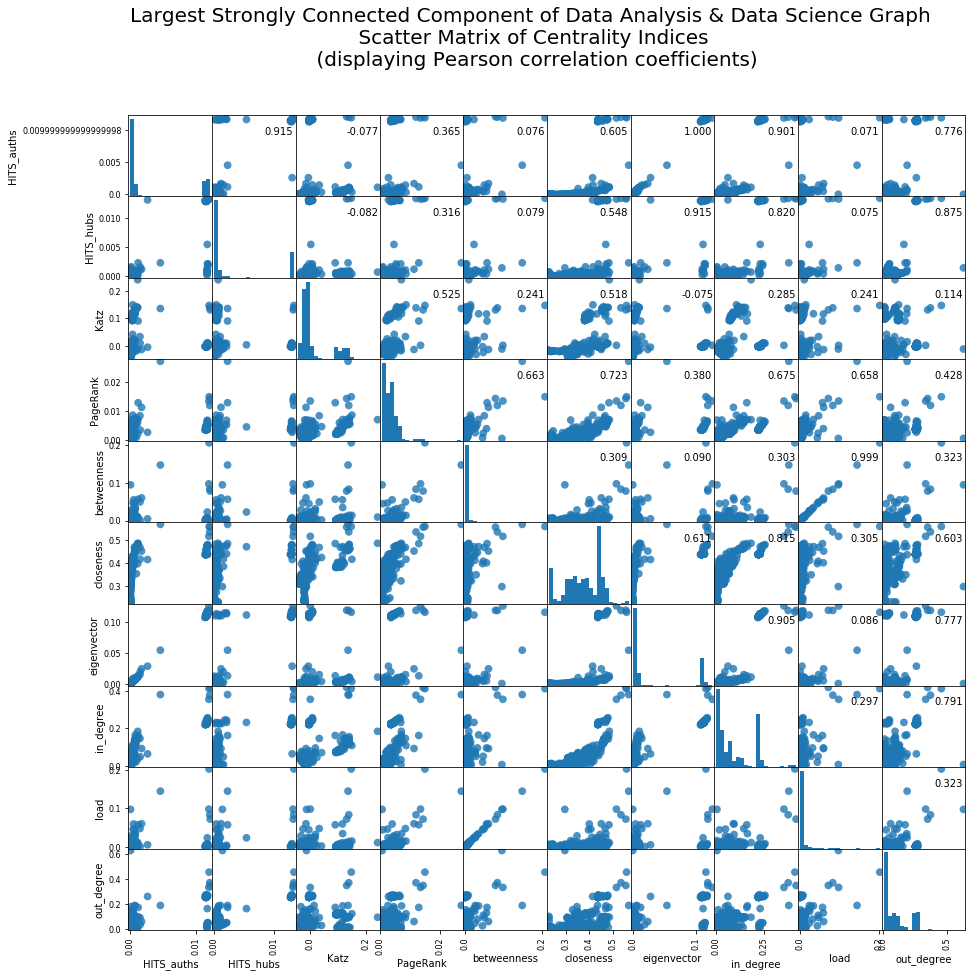

In [16]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

## Co-hyperlinked undirected graph of Largest, Strongly Connected Component

In [57]:
GLCC2=GLCC.copy()
medgesout=[]
n_out=[n for n in GLCC2.nodes() if GLCC2.out_degree(n)>1]
for n in n_out:
    nn=list(GLCC2.successors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesout.append((j[0],j[1]))

name="the corresponding to GLCC induced co-linked undirected graph"
GLCCcout=nx.MultiGraph()
GLCCcout.add_edges_from(medgesout)
GLCCcout=nx.MultiGraph(GLCCcout,name=name)

GLCCcout1=GLCCcout.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(GLCCcout1.edges()).items()]
GLCCcout1 = nx.Graph(weight)
edge_width=[GLCCcout1[u][v]['weight'] for u,v in GLCCcout1.edges()]

In [58]:
print "GLCCcout is %s with %i nodes and %i edges" %(str(GLCCcout),len(GLCCcout1.nodes()),len(GLCCcout1.edges()))
if nx.is_weighted(GLCCcout1)==True:
    print "GLCCcout is a weighted undirected graph"
else:
    print "GLCCcout is an unweighted undirected graph"
if nx.is_connected(GLCCcout)==True:
    print "GLCCcout is a connected graph"
else:
    print "GLCCcout is a disconnected graph and it has",nx.number_connected_components(GLCCcout),"connected components"    
print "The density of GLCCcout is %.3f" %nx.density(GLCCcout)

GLCCcout is the corresponding to GLCC induced co-linked undirected graph with 318 nodes and 32387 edges
GLCCcout is a weighted undirected graph
GLCCcout is a connected graph
The density of GLCCcout is 6.241


In [59]:
#to determine the top nodes
x = dict(nx.degree(GLCCcout1))
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
for k,v in sorted_x:
    print k,v

Data_mining 309
Statistics 309
Machine_learning 308
Database 303
Data 303
Big_data 299
Principal_component_analysis 298
Regression_analysis 298
Data_science 295
Data_collection 294
Analytics 294
Statistical_inference 293
R_(programming_language) 293
Predictive_analytics 292
Numerical_analysis 292
Business_intelligence 292
Cross-validation_(statistics) 292
Data_warehouse 291
Data_quality 291
Statistical_model 291
Data_visualization 290
Extract,_transform,_load 290
Multilinear_subspace_learning 290
Exploratory_data_analysis 290
Descriptive_statistics 289
ELKI 288
Missing_data 288
Data_curation 288
Statistical_hypothesis_testing 288
Computational_physics 288
Information_privacy 288
KNIME 287
Outlier 287
Orange_(software) 287
Structured_data_analysis_(statistics) 287
Data_transformation 286
Data_integrity 286
Data_(computing) 286
Probability_distribution 285
Statistical_graphics 285
System_identification 285
Correlation_and_dependence 285
Pie_chart 285
Control_chart 285
Stem-and-leaf_displ

In [69]:
ftop_nodes= [u'Data_mining',
 u'Statistics',
 u'Machine_learning',
 u'Database',
 u'Data',
 u'Big_data',
 u'Principal_component_analysis',
 u'Regression_analysis',
 u'Data_science',
 u'Data_collection',
 u'Analytics',
 u'Statistical_inference',
 u'R_(programming_language)',
 u'Predictive_analytics',
 u'Numerical_analysis',
 u'Business_intelligence',
 u'Cross-validation_(statistics)']

In [70]:
H=GLCCcout1.copy()
nas=[]
for a in H.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    H.remove_node(x)
ca=ftop_nodes
so=[n for n in list(H.nodes()) if n not in ca]
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posa=graphviz_layout(Ha)  # nx.circular_layout(Ha)
posb=graphviz_layout(Hb) #nx.spring_layout(Hb,k=2.5) #

d=2.5 #can play around 3
xd=-50. #can play around -200
yd=-1. #can play around -100

posa1={}
for k,v in posa.items(): 
    vv=list(v)
    vv[0] = xd+vv[0]*d
    vv[1] = yd+vv[1]*d
    posa1[k]=tuple(vv)
posAll=dict(posb.items()+posa1.items()+[(k,posb[k]+posa1[k]) for k in set(posa1)&set(posb)])

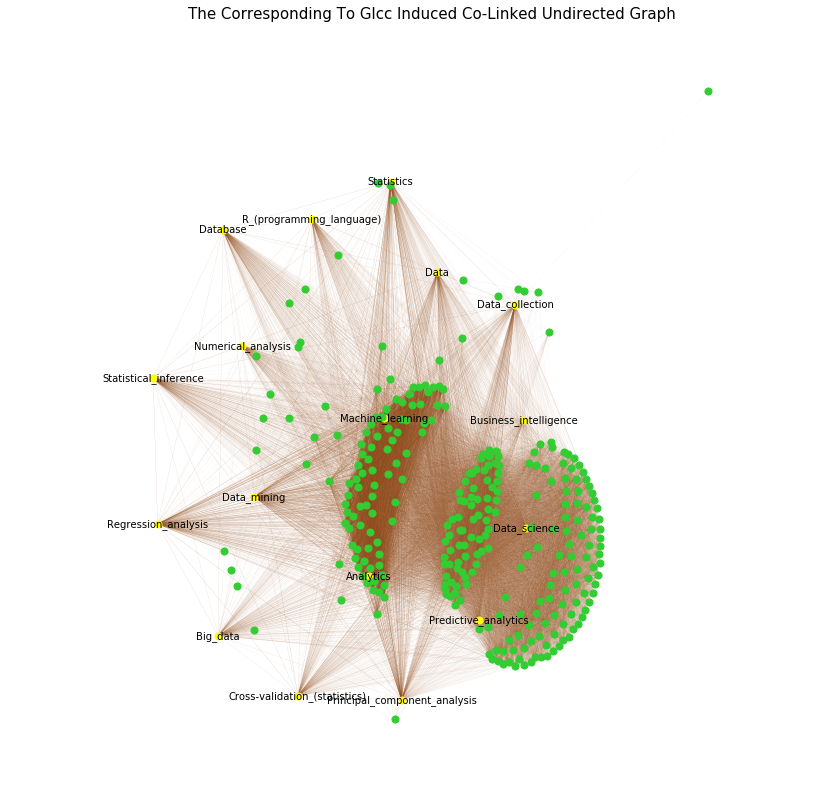

In [71]:
fig = plt.figure(figsize=(14,14))

labels ={}
for n in H.nodes():
    if n not in ftop_nodes:
        labels[n]=" "
    else:
        labels[n]=n

edge_width=[H[u][v]['weight'] for u,v in H.edges()]
edge_width1 = edge_width[:]
edge_width1=[0.05*math.log(1+e) for e in edge_width1] #can change this to other amounts like 0.5

nx.draw_networkx_edges(H, pos=posAll, width=edge_width1, edge_color="saddlebrown", alpha=.4) 
nodes = nx.draw_networkx_nodes(Ha, pos=posa1, nodelist=ca, node_size = 50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Hb, pos=posb, nodelist=so, node_size = 50, node_color="limegreen", alpha=1)
nx.draw_networkx_labels(H,pos=posAll,labels=labels,font_size=10);
name="the corresponding to GLCC induced co-linked undirected graph"
plt.title(name.title(),fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.axis('off');

## Communities of the hyperlinked undirected graph of Largest, Strongly Connected Component

In [23]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

The graph has 3 Louvain communities and modularity coefficient equal to 0.29037096225
Community 0 with 209 nodes: [u'Predictive_analytics', u'Information_displays', u'Probability_distribution', u'Data_library', u'Data_modeling', u'Dissipative_particle_dynamics', u'Harmonics', u'Data_visualization', u'Manipulation_check', u'Gideon_J._Mellenbergh', u'Descriptive_statistics', u'Reliability_(statistics)', u'Dropout_(electronics)', u'Statistician', u'Lennard-Jones_potential', u'John_W._Tukey', u'Scatterplot', u'Subharmonics', u'Control_chart', u'Cognitive_bias', u'Over-the-counter_data', u'Cross-industry_standard_process_for_data_mining', u'Data_degradation', u'Measuring_instrument', u"Cronbach's_alpha", u'Data_preservation', u'R_(programming_language)', u'Numeracy', u'Data_compression', u'Multilinear_principal_component_analysis', u'Data_stewardship', u'Data_quality', u'Ben_Shneiderman', u'Sensitivity_analysis', u'Outlier', u'Riemann_solver', u'Data_integration', u'Digital_signal_processin

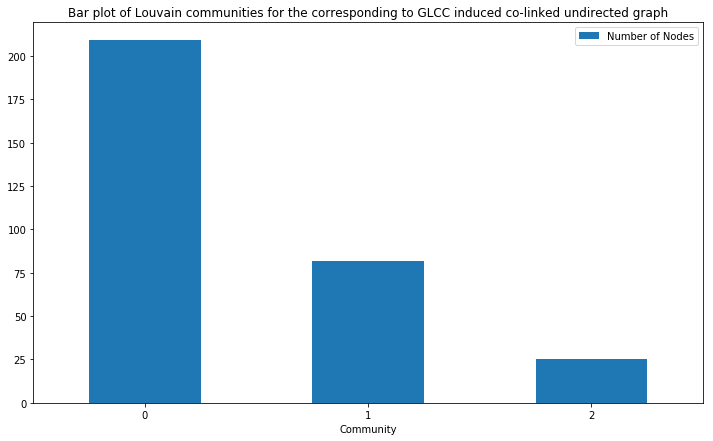

In [26]:
partition = community.best_partition(GLCCcout1)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, GLCCcout1, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

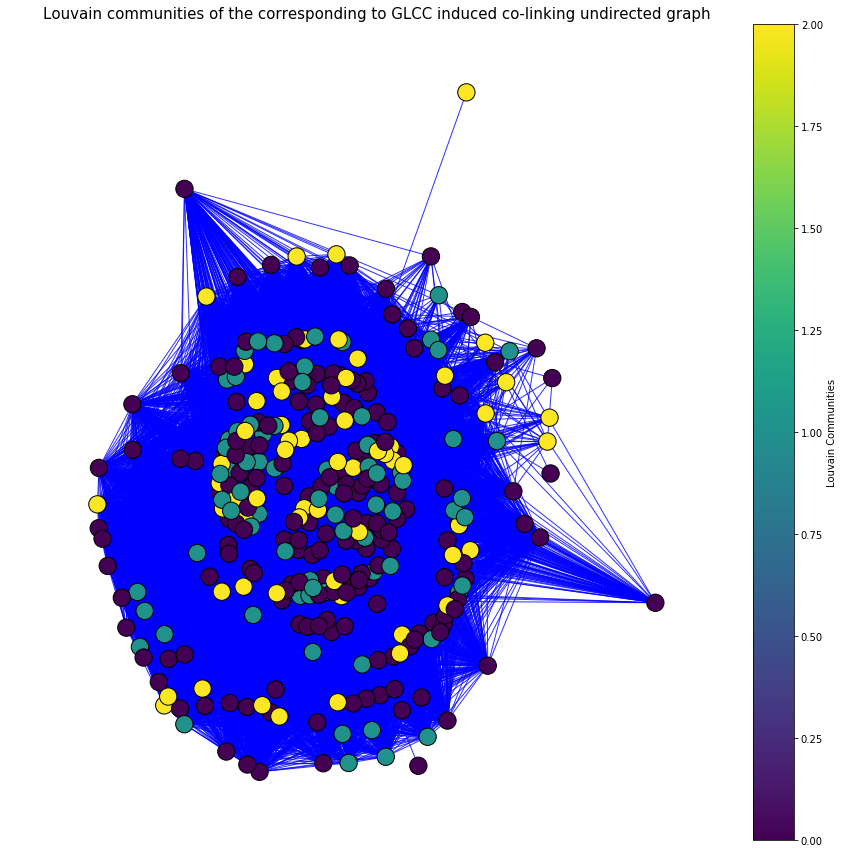

In [41]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(15,15));
node_border_color='k'
nodes = nx.draw_networkx_nodes(GLCCcout1, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(GLCCcout1, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -7 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(GLCCcout1, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

## Co-hyperlinking undirected graph of Largest, Strongly Connected Component

In [72]:
GLCC1=GLCC.copy()
medgesin=[]
n_in=[n for n in GLCC1.nodes() if GLCC1.in_degree(n)>1]
for n in n_in:
    nn=list(GLCC1.predecessors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesin.append((j[0],j[1]))

name="the corresponding to GLCC induced co-linking undirected graph"
GLCCcin=nx.MultiGraph()
GLCCcin.add_edges_from(medgesin)
GLCCcin=nx.MultiGraph(GLCCcin,name=name)

GLCCcin1=GLCCcin.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(GLCCcin1.edges()).items()]
GLCCcin1 = nx.Graph(weight)
edge_width=[GLCCcin1[u][v]['weight'] for u,v in GLCCcin1.edges()]

In [73]:
print "GLCCcin is %s with %i nodes and %i edges" %(str(GLCCcin),len(GLCCcin1.nodes()),len(GLCCcin1.edges()))
if nx.is_weighted(GLCCcin1)==True:
    print "GLCCcin is a weighted undirected graph"
else:
    print "GLCCcin is an unweighted undirected graph"
if nx.is_connected(GLCCcin)==True:
    print "GLCCcin is a connected graph"
else:
    print "GLCCcin is a disconnected graph and it has",nx.number_connected_components(GLCCcin),"connected components"    
print "The density of GLCCcin is %.3f" %nx.density(GLCCcin)

GLCCcin is the corresponding to GLCC induced co-linking undirected graph with 318 nodes and 23594 edges
GLCCcin is a weighted undirected graph
GLCCcin is a connected graph
The density of GLCCcin is 5.514


In [74]:
#to determine the top nodes
x = dict(nx.degree(GLCCcin1))
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
for k,v in sorted_x:
    print k,v

Data_Analysis 299
Data_mining 274
Statistics 265
Database 262
Data 260
Exploratory_data_analysis 260
Computational_physics 258
Machine_learning 256
Regression_analysis 254
Data_visualization 252
Reliability_(statistics) 252
Data_Presentation_Architecture 252
Interactive_data_visualization 252
Glossary_of_artificial_intelligence 252
Statistical_graphics 251
Numerical_analysis 251
Big_data 248
Misleading_graph 246
Infographic 246
Information 243
Principal_component_analysis 242
Information_design 242
Computing 241
Data_analysis 241
Data_science 241
Reinforcement_learning 240
Monte_Carlo_method 238
Computer_science 236
Analytics 236
Cluster_analysis 235
Naive_Bayes_classifier 233
Decision_tree_learning 233
Wavelet 231
Statistical_inference 230
Inferential_statistics 230
Statistical_hypothesis_testing 229
Hypothesis_testing 229
Data_collection 229
Actuarial_science 228
Propensity_score_matching 227
Probability_distribution 225
Graphical_model 225
Ensemble_learning 225
Statistical_learning_

In [78]:
ftop_nodes= [u'Data_Analysis',
 u'Data_mining',
 u'Statistics',
 u'Database',
 u'Data',
 u'Exploratory_data_analysis',
 u'Computational_physics',
 u'Machine_learning',
 u'Regression_analysis',
 u'Data_visualization',
 u'Reliability_(statistics)',
 u'Data_Presentation_Architecture',
 u'Interactive_data_visualization',
 u'Glossary_of_artificial_intelligence',
 u'Statistical_graphics',
 u'Numerical_analysis']

In [81]:
H=GLCCcin1.copy()
nas=[]
for a in H.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    H.remove_node(x)
ca=ftop_nodes
so=[n for n in list(H.nodes()) if n not in ca]
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posa=graphviz_layout(Ha)  # nx.circular_layout(Ha)
posb=graphviz_layout(Hb) #nx.spring_layout(Hb,k=2.5) #

d=2.5 #can play around 3
xd=-50. #can play around -200
yd=-1. #can play around -100

posa1={}
for k,v in posa.items(): 
    vv=list(v)
    vv[0] = xd+vv[0]*d
    vv[1] = yd+vv[1]*d
    posa1[k]=tuple(vv)
posAll=dict(posb.items()+posa1.items()+[(k,posb[k]+posa1[k]) for k in set(posa1)&set(posb)])

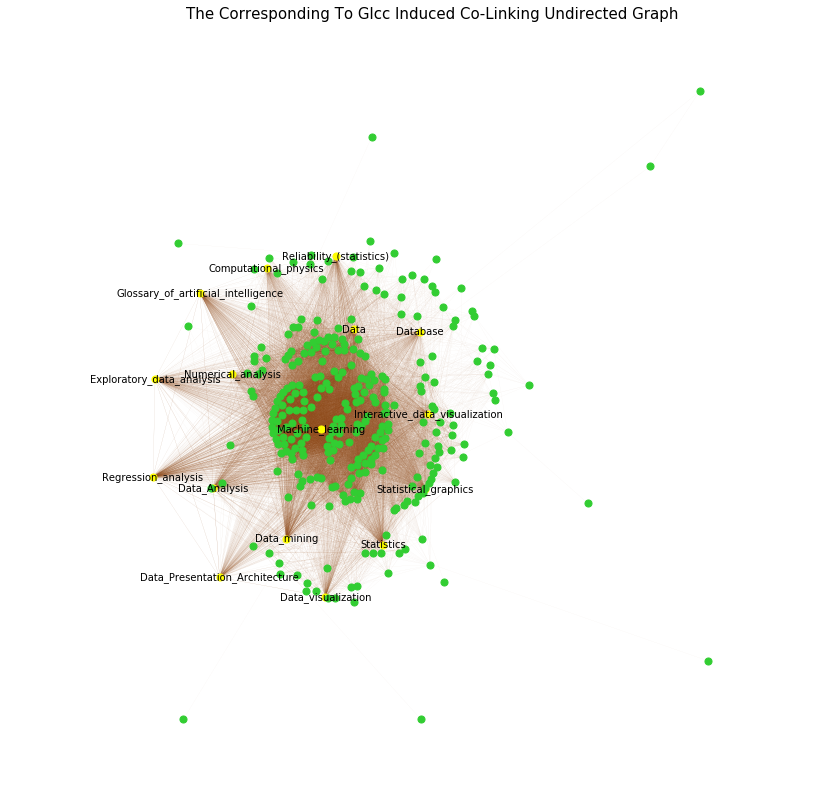

In [82]:
fig = plt.figure(figsize=(14,14))

labels ={}
for n in H.nodes():
    if n not in ftop_nodes:
        labels[n]=" "
    else:
        labels[n]=n

edge_width=[H[u][v]['weight'] for u,v in H.edges()]
edge_width1 = edge_width[:]
edge_width1=[0.05*math.log(1+e) for e in edge_width1] #can change this to other amounts like 0.5

nx.draw_networkx_edges(H, pos=posAll, width=edge_width1, edge_color="saddlebrown", alpha=.4) 
nodes = nx.draw_networkx_nodes(Ha, pos=posa1, nodelist=ca, node_size = 50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Hb, pos=posb, nodelist=so, node_size = 50, node_color="limegreen", alpha=1)
nx.draw_networkx_labels(H,pos=posAll,labels=labels,font_size=10);
name="the corresponding to GLCC induced co-linking undirected graph"
plt.title(name.title(),fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.axis('off');

## Communities of the hyperlinking undirected graph of Largest, Strongly Connected Component

The graph has 3 Louvain communities and modularity coefficient equal to 0.25034253521
Community 0 with 182 nodes: [u'Predictive_analytics', u'Information_displays', u'Probability_distribution', u'Dissipative_particle_dynamics', u'Harmonics', u'Data_visualization', u'Manipulation_check', u'Gideon_J._Mellenbergh', u'Descriptive_statistics', u'Paradigm', u'Reliability_(statistics)', u'Statistician', u'Lennard-Jones_potential', u'John_W._Tukey', u'Scatterplot', u'Subharmonics', u'Control_chart', u'Cognitive_bias', u'Over-the-counter_data', u'Measuring_instrument', u"Cronbach's_alpha", u'Computational_science', u'R_(programming_language)', u'Numeracy', u'Multilinear_principal_component_analysis', u'Bias\u2013variance_dilemma', u'Ben_Shneiderman', u'Sensitivity_analysis', u'Outlier', u'Riemann_solver', u'Logistic_regression', u'Digital_signal_processing', u'Missing_data', u'Standard_deviation', u'Molecular_dynamics', u'Smoothed-particle_hydrodynamics', u'Multi-disciplinary', u'Peter_Naur', u

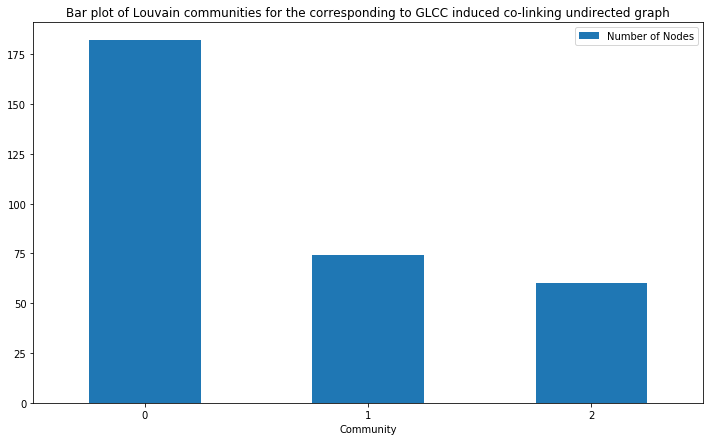

In [37]:
partition = community.best_partition(GLCCcin1)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, GLCCcin1, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

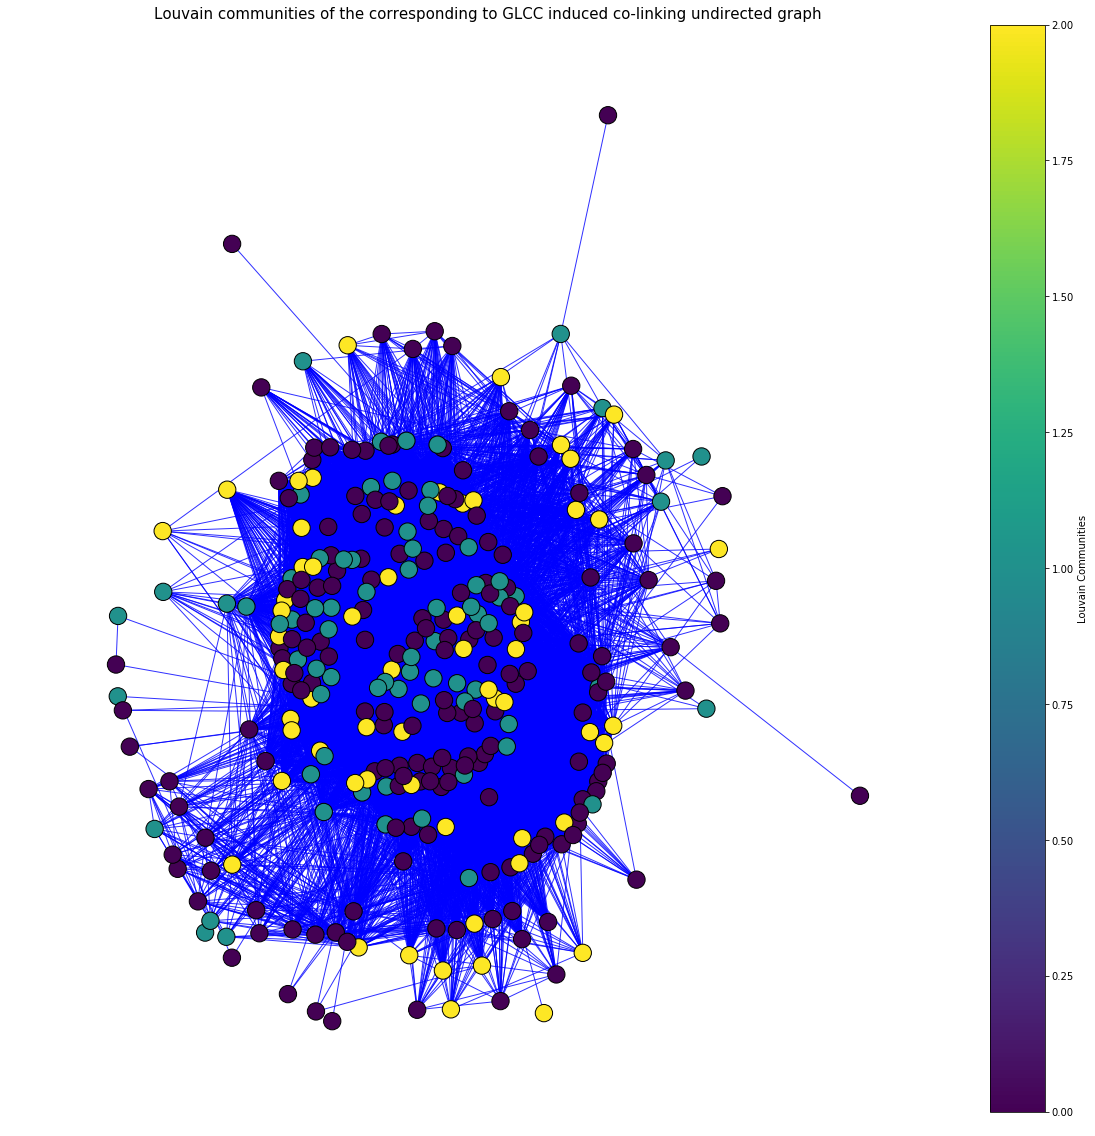

In [40]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(20,20));
node_border_color='k'
nodes = nx.draw_networkx_nodes(GLCCcin1, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(GLCCcin1, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -7 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(GLCCcin1, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 